# Рекомендация тарифов

# Введение
**Описание проекта**: Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.
Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

**Цель исследования**: Обучить модель для задачи классификации, которая на основании поведения клиентов подберет для них подходящий тариф.

**Задачи исследования**:
1. Ознакомиться с имеющимися в распоряжении данными об активности клиентов.
2. Разбить данные на выборки.
3. Исследовать модели машинного обучения и выбрать лучшую.
4. Проверить лучшую модель на тестовой выборке.
5. Проверить модель на адекватность.
   
**Описание данных**: Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* `сalls` — количество звонков,
* `minutes` — суммарная длительность звонков в минутах,
* `messages` — количество sms-сообщений,
* `mb_used` — израсходованный интернет-трафик в Мб,
* `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — `1`, «Смарт» — `0`).

<a id="point0"></a>
**Основные этапы исследования**:
* [1 Шаг 1. Открытие файла с данными и изучение общей информации](#Шаг-1.-Открытие-файла-с-данными-и-изучение-общей-информации)
* [1.1 Загрузка данных из файла в датафрейм](#Загрузка-данных-из-файла-в-датафрейм)
* [1.2 Изучение общей информации о полученном датасете](#Изучение-общей-информации-о-полученном-датасете)
* [1.3 Построение общей гистограммы для всех числовых столбцов таблицы](#Построение-общей-гистограммы-для-всех-числовых-столбцов-таблицы)
* [2 Шаг 2. Разбивка данных на выборки](#Шаг-2.-Разбивка-данных-на-выборки)
* [3 Шаг 3. Масштабирование данных](#Шаг-3.-Масштабирование-данных)
* [4 Шаг 4. Исследование моделей](#Шаг-4.-Исследование-моделей)
* [4.1 Модель "решающее дерево"](#Модель-&quot;решающее-дерево&quot;)
* [4.2 Модель "случайный лес"](#Модель-&quot;случайный-лес&quot;)
* [4.3 Модель "логистическая регрессия"](#Модель-&quot;логистическая-регрессия&quot;)
* [4.4 Метод опорных векторов](#Метод-опорных-векторов)
* [5 Шаг 5. Проверка модели на тестовой выборке](#Шаг-5.-Проверка-модели-на-тестовой-выборке)
* [6 Шаг 6. Проверка модели на адекватность](#Шаг-6.-Проверка-модели-на-адекватность)
* [7 Шаг 7. Общий вывод](#Шаг-7.-Общий-вывод)

## Шаг 1. Открытие файла с данными и изучение общей информации
### Загрузка данных из файла в датафрейм

In [1]:
import pandas as pd  # Импорт библиотеки pandas
import matplotlib.pyplot as plt  # Импорт библиотеки для работы с графиками

from sklearn.model_selection import train_test_split # импорт функции для разбивки датасета на выборки
from sklearn.metrics import accuracy_score # импорт метрики accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler # импорт функции масштабирования данных

# импорт моделей машинного обучения:
from sklearn.tree import DecisionTreeClassifier # Решающее дерево
from sklearn.ensemble import RandomForestClassifier # Случайный лес
from sklearn.linear_model import LogisticRegression # Логистическая регрессия
from sklearn.svm import SVC # Метод опорных векторов

# открытие датасета:
data = pd.read_csv('/datasets/users_behavior.csv')

# формат вывода float-чисел датафрейма
pd.options.display.float_format = ("{:.3f}".format)  

# переменные для задания цвета шрифта при выводе информации:
green, red, blue, pink, black, bold, end = '\33[92m', '\33[91m', '\33[36m', '\33[95m','\33[7m', '\33[1m','\33[0m'

# установка цветовой палитры:
colors_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

### Изучение общей информации о полученном датасете

In [2]:
data.head() # Вывод первых строк датасета

,calls,minutes,messages,mb_used,is_ultra
0,40.000,311.900,83.000,19915.420,0
1,85.000,516.750,56.000,22696.960,0
2,77.000,467.660,86.000,21060.450,0
3,106.000,745.530,81.000,8437.390,1
4,66.000,418.740,1.000,14502.750,0


In [3]:
data.info() # Вывод основной информации о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data.describe() # Вывод основной описательной информации по числовым столбцам датафрейма

,calls,minutes,messages,mb_used,is_ultra
count,3214.000,3214.000,3214.000,3214.000,3214.000
mean,63.039,438.209,38.281,17207.674,0.306
std,33.236,234.570,36.148,7570.968,0.461
min,0.000,0.000,0.000,0.000,0.000
25%,40.000,274.575,9.000,12491.903,0.000
50%,62.000,430.600,30.000,16943.235,0.000
75%,82.000,571.927,57.000,21424.700,1.000
max,244.000,1632.060,224.000,49745.730,1.000


**Вывод**: 
* Для стообцов `calls`, `minutes`, `messages`, `mb_used` медианное и среднее значение отличаются незначительно, что говорит о том, что для указанных столбцов данные распределены в пределах диапазона без явных выбросов.
* Примерно 31% данных датасета для тарифа «Ультра» и, соответственно, 69% для тарифа «Смарт».

### Построение общей гистограммы для всех числовых столбцов таблицы

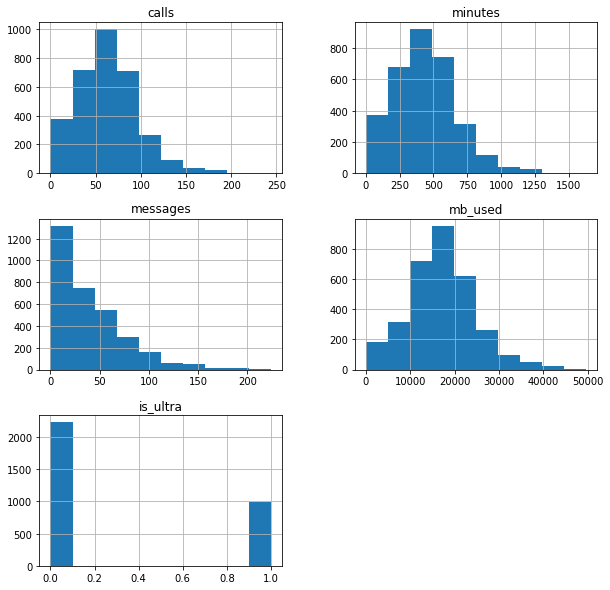

In [5]:
data.hist(figsize=(10, 10));

**Выводы**: 
* Датасет представляет собой набор данных состоящий из 5 столбцов и 3214 строк.
* Типы данных в столбцах распределены следующим образом: `float64`(4), `int64`(1).
* Заголовки соответствуют змеиному регистру. В датасете отсутствуют пропуски и аномальные значения. Данные не требуют предварительной обработки. 

[Вернуться к оглавлению](#point0)

## Шаг 2. Разбивка данных на выборки

В процессе обучения модели весь набор исследуемых данных можно представить в виде выборок:
* **Тренировочная**. Используется для обучения модели.
* **Валидационная**. Валидация показывает, как поведёт себя модель с незнакомыми данными после обучения.
* **Тестовая**. Тестовая выборка нужна, для правильной оценки готовой модели.

Валидационная выборка отбирается из исходного датасета ещё до обучения модели. Иначе, обучившись на тренировочном наборе, модель будет знать все ответы. Именно валидация подсказывает, как ведёт себя модель в полевых условиях и нет ли переобучения.

Какую часть данных отвести под валидационную выборку, решают в зависимости от количества объектов, признаков и вариативности данных. Вот два самых распространённых сценария:
1) **Доступен исходный датасет, а тестовая выборка спрятана**. Тогда рекомендуется 75% данных отвести под обучающую, а 25% — под валидационную. Соотношение 3:1.

![svg image](data:image/svg+xml,%3Csvg%20version%3D%221.1%22%20viewBox%3D%220.0%200.0%20960.0%20360.0%22%20fill%3D%22none%22%20stroke%3D%22none%22%20stroke-linecap%3D%22square%22%20stroke-miterlimit%3D%2210%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%3E%3CclipPath%20id%3D%22p.0%22%3E%3Cpath%20d%3D%22m0%200l960.0%200l0%20540.0l-960.0%200l0%20-540.0z%22%20clip-rule%3D%22nonzero%22/%3E%3C/clipPath%3E%3Cg%20clip-path%3D%22url%28%23p.0%29%22%3E%3Cpath%20fill%3D%22%23ffffff%22%20d%3D%22m0%200l960.0%200l0%20540.0l-960.0%200z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m124.32546%2056.572556l0%200c0%20-10.437084%208.46093%20-18.898014%2018.898018%20-18.898014l404.1567%200c5.012085%200%209.818848%201.9910355%2013.362915%205.535099c3.5440674%203.5440674%205.535095%208.350849%205.535095%2013.362915l0%2075.5898c0%2010.437088%20-8.4609375%2018.89801%20-18.89801%2018.89801l-404.1567%200l0%200c-10.437088%200%20-18.898018%20-8.460922%20-18.898018%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%23595959%22%20stroke-width%3D%222.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m124.32546%2056.572556l0%200c0%20-10.437084%208.46093%20-18.898014%2018.898018%20-18.898014l404.1567%200c5.012085%200%209.818848%201.9910355%2013.362915%205.535099c3.5440674%203.5440674%205.535095%208.350849%205.535095%2013.362915l0%2075.5898c0%2010.437088%20-8.4609375%2018.89801%20-18.89801%2018.89801l-404.1567%200l0%200c-10.437088%200%20-18.898018%20-8.460922%20-18.898018%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m267.9554%2076.92808l1.59375%200l0%2010.578125l7.109375%20-10.578125l1.78125%200l0%2013.359375l-1.609375%200l0%20-10.546875l-7.109375%2010.546875l-1.765625%200l0%20-13.359375zm19.487305%209.8125l1.609375%200.21875q-0.265625%201.65625%20-1.359375%202.609375q-1.078125%200.9375%20-2.671875%200.9375q-1.984375%200%20-3.1875%20-1.296875q-1.203125%20-1.296875%20-1.203125%20-3.71875q0%20-1.578125%200.515625%20-2.75q0.515625%20-1.171875%201.578125%20-1.75q1.0625%20-0.59375%202.3125%20-0.59375q1.578125%200%202.578125%200.796875q1.0%200.796875%201.28125%202.265625l-1.59375%200.234375q-0.234375%20-0.96875%20-0.8125%20-1.453125q-0.578125%20-0.5%20-1.390625%20-0.5q-1.234375%200%20-2.015625%200.890625q-0.78125%200.890625%20-0.78125%202.8125q0%201.953125%200.75%202.84375q0.75%200.875%201.953125%200.875q0.96875%200%201.609375%20-0.59375q0.65625%20-0.59375%200.828125%20-1.828125zm1.921875%203.546875l3.53125%20-5.03125l-3.265625%20-4.640625l2.046875%200l1.484375%202.265625q0.421875%200.640625%200.671875%201.078125q0.40625%20-0.59375%200.734375%20-1.0625l1.640625%20-2.28125l1.953125%200l-3.34375%204.546875l3.59375%205.125l-2.015625%200l-1.984375%20-3.0l-0.515625%20-0.8125l-2.546875%203.8125l-1.984375%200zm9.602844%20-4.84375q0%20-2.6875%201.484375%20-3.96875q1.25%20-1.078125%203.046875%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.28125%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.796875%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.796875%200.90625%20-0.796875%202.765625zm10.168701%20-4.828125l6.75%200l0%208.328125l1.046875%200l0%204.078125l-1.34375%200l0%20-2.734375l-7.625%200l0%202.734375l-1.34375%200l0%20-4.078125l0.859375%200q1.734375%20-2.359375%201.65625%20-8.328125zm1.375%201.359375q-0.1875%204.703125%20-1.453125%206.96875l5.203125%200l0%20-6.96875l-3.75%200zm8.229584%20-1.359375l1.640625%200l0%204.03125l4.546875%200l0%20-4.03125l1.640625%200l0%209.671875l-1.640625%200l0%20-4.296875l-4.546875%200l0%204.296875l-1.640625%200l0%20-9.671875zm19.505981%200l1.640625%200l0%209.671875l-1.640625%200l0%20-9.671875zm-9.171875%200l1.640625%200l0%203.78125l2.078125%200q2.03125%200%203.125%200.796875q1.09375%200.78125%201.09375%202.15625q0%201.21875%20-0.921875%202.078125q-0.90625%200.859375%20-2.921875%200.859375l-4.09375%200l0%20-9.671875zm1.640625%208.328125l1.71875%200q1.5625%200%202.21875%20-0.375q0.671875%20-0.390625%200.671875%20-1.203125q0%20-0.625%20-0.5%20-1.109375q-0.484375%20-0.5%20-2.171875%20-0.5l-1.9375%200l0%203.1875zm18.362305%20-1.765625l1.6875%200.203125q-0.40625%201.484375%20-1.484375%202.3125q-1.078125%200.8125%20-2.765625%200.8125q-2.125%200%20-3.375%20-1.296875q-1.234375%20-1.3125%20-1.234375%20-3.671875q0%20-2.453125%201.25%20-3.796875q1.265625%20-1.34375%203.265625%20-1.34375q1.9375%200%203.15625%201.328125q1.234375%201.3125%201.234375%203.703125q0%200.15625%200%200.4375l-7.21875%200q0.09375%201.59375%200.90625%202.453125q0.8125%200.84375%202.015625%200.84375q0.90625%200%201.546875%20-0.46875q0.640625%20-0.484375%201.015625%20-1.515625zm-5.390625%20-2.65625l5.40625%200q-0.109375%20-1.21875%20-0.625%20-1.828125q-0.78125%20-0.953125%20-2.03125%20-0.953125q-1.125%200%20-1.90625%200.765625q-0.765625%200.75%20-0.84375%202.015625zm15.605896%20-3.90625l6.75%200l0%208.328125l1.046875%200l0%204.078125l-1.34375%200l0%20-2.734375l-7.625%200l0%202.734375l-1.34375%200l0%20-4.078125l0.859375%200q1.734375%20-2.359375%201.65625%20-8.328125zm1.375%201.359375q-0.1875%204.703125%20-1.453125%206.96875l5.203125%200l0%20-6.96875l-3.75%200zm14.542084%207.125q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm4.2038574%20-4.8125l1.640625%200l0%204.03125l4.546875%200l0%20-4.03125l1.640625%200l0%209.671875l-1.640625%200l0%20-4.296875l-4.546875%200l0%204.296875l-1.640625%200l0%20-9.671875zm10.302856%200l1.640625%200l0%204.03125l4.546875%200l0%20-4.03125l1.640625%200l0%209.671875l-1.640625%200l0%20-4.296875l-4.546875%200l0%204.296875l-1.640625%200l0%20-9.671875zm19.50595%200l1.640625%200l0%209.671875l-1.640625%200l0%20-9.671875zm-9.171875%200l1.640625%200l0%203.78125l2.078125%200q2.03125%200%203.125%200.796875q1.09375%200.78125%201.09375%202.15625q0%201.21875%20-0.921875%202.078125q-0.90625%200.859375%20-2.921875%200.859375l-4.09375%200l0%20-9.671875zm1.640625%208.328125l1.71875%200q1.5625%200%202.21875%20-0.375q0.671875%20-0.390625%200.671875%20-1.203125q0%20-0.625%20-0.5%20-1.109375q-0.484375%20-0.5%20-2.171875%20-0.5l-1.9375%200l0%203.1875zm18.362305%20-1.765625l1.6875%200.203125q-0.40625%201.484375%20-1.484375%202.3125q-1.078125%200.8125%20-2.765625%200.8125q-2.125%200%20-3.375%20-1.296875q-1.234375%20-1.3125%20-1.234375%20-3.671875q0%20-2.453125%201.25%20-3.796875q1.265625%20-1.34375%203.265625%20-1.34375q1.9375%200%203.15625%201.328125q1.234375%201.3125%201.234375%203.703125q0%200.15625%200%200.4375l-7.21875%200q0.09375%201.59375%200.90625%202.453125q0.8125%200.84375%202.015625%200.84375q0.90625%200%201.546875%20-0.46875q0.640625%20-0.484375%201.015625%20-1.515625zm-5.390625%20-2.65625l5.40625%200q-0.109375%20-1.21875%20-0.625%20-1.828125q-0.78125%20-0.953125%20-2.03125%20-0.953125q-1.125%200%20-1.90625%200.765625q-0.765625%200.75%20-0.84375%202.015625z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m328.3972%20112.28745l-1.640625%200l0%20-10.453125q-0.59375%200.5625%20-1.5625%201.140625q-0.953125%200.5625%20-1.71875%200.84375l0%20-1.59375q1.375%20-0.640625%202.40625%20-1.5625q1.03125%20-0.921875%201.453125%20-1.78125l1.0625%200l0%2013.40625zm4.2038574%20-6.59375q0%20-2.359375%200.484375%20-3.796875q0.484375%20-1.453125%201.4375%20-2.234375q0.96875%20-0.78125%202.421875%20-0.78125q1.078125%200%201.890625%200.4375q0.8125%200.421875%201.328125%201.25q0.53125%200.8125%200.828125%201.984375q0.3125%201.15625%200.3125%203.140625q0%202.359375%20-0.484375%203.8125q-0.484375%201.4375%20-1.453125%202.234375q-0.953125%200.78125%20-2.421875%200.78125q-1.921875%200%20-3.03125%20-1.390625q-1.3125%20-1.671875%20-1.3125%20-5.4375zm1.671875%200q0%203.296875%200.765625%204.390625q0.78125%201.078125%201.90625%201.078125q1.140625%200%201.90625%20-1.09375q0.765625%20-1.09375%200.765625%20-4.375q0%20-3.296875%20-0.765625%20-4.375q-0.765625%20-1.078125%20-1.921875%20-1.078125q-1.125%200%20-1.796875%200.953125q-0.859375%201.21875%20-0.859375%204.5zm8.703827%200q0%20-2.359375%200.484375%20-3.796875q0.484375%20-1.453125%201.4375%20-2.234375q0.96875%20-0.78125%202.421875%20-0.78125q1.078125%200%201.890625%200.4375q0.8125%200.421875%201.328125%201.25q0.53125%200.8125%200.828125%201.984375q0.3125%201.15625%200.3125%203.140625q0%202.359375%20-0.484375%203.8125q-0.484375%201.4375%20-1.453125%202.234375q-0.953125%200.78125%20-2.421875%200.78125q-1.921875%200%20-3.03125%20-1.390625q-1.3125%20-1.671875%20-1.3125%20-5.4375zm1.671875%200q0%203.296875%200.765625%204.390625q0.78125%201.078125%201.90625%201.078125q1.140625%200%201.90625%20-1.09375q0.765625%20-1.09375%200.765625%20-4.375q0%20-3.296875%20-0.765625%20-4.375q-0.765625%20-1.078125%20-1.921875%20-1.078125q-1.125%200%20-1.796875%200.953125q-0.859375%201.21875%20-0.859375%204.5zm9.000732%20-3.546875q0%20-1.4375%200.71875%20-2.4375q0.71875%20-1.0%202.09375%20-1.0q1.25%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.84375%202.609375q-0.828125%200.921875%20-2.046875%200.921875q-1.203125%200%20-2.015625%20-0.90625q-0.8125%20-0.90625%20-0.8125%20-2.71875zm2.859375%20-2.3125q-0.609375%200%20-1.015625%200.53125q-0.40625%200.53125%20-0.40625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.015625%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.40625%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125zm0%2012.9375l7.3125%20-14.0625l1.328125%200l-7.28125%2014.0625l-1.359375%200zm5.78125%20-3.625q0%20-1.4375%200.71875%20-2.421875q0.71875%20-1.0%202.09375%20-1.0q1.265625%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.828125%202.609375q-0.828125%200.90625%20-2.0625%200.90625q-1.21875%200%20-2.03125%20-0.90625q-0.796875%20-0.90625%20-0.796875%20-2.71875zm2.859375%20-2.296875q-0.625%200%20-1.03125%200.53125q-0.390625%200.53125%20-0.390625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.03125%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.421875%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m124.32546%20255.919l0%200c0%20-10.437073%208.46093%20-18.89801%2018.898018%20-18.89801l226.14096%200c5.012085%200%209.818848%201.9910431%2013.362915%205.535095c3.5440674%203.5440674%205.5351257%208.350861%205.5351257%2013.362915l0%2075.58981c0%2010.437073%20-8.4609375%2018.89801%20-18.89804%2018.89801l-226.14096%200l0%200c-10.437088%200%20-18.898018%20-8.4609375%20-18.898018%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%23595959%22%20stroke-width%3D%222.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m124.32546%20255.919l0%200c0%20-10.437073%208.46093%20-18.89801%2018.898018%20-18.89801l226.14096%200c5.012085%200%209.818848%201.9910431%2013.362915%205.535095c3.5440674%203.5440674%205.5351257%208.350861%205.5351257%2013.362915l0%2075.58981c0%2010.437073%20-8.4609375%2018.89801%20-18.89804%2018.89801l-226.14096%200l0%200c-10.437088%200%20-18.898018%20-8.4609375%20-18.898018%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m205.1851%20272.1339q0%20-3.328125%201.78125%20-5.203125q1.78125%20-1.890625%204.609375%20-1.890625q1.84375%200%203.328125%200.890625q1.484375%200.875%202.265625%202.46875q0.78125%201.578125%200.78125%203.578125q0%202.03125%20-0.828125%203.640625q-0.8125%201.59375%20-2.3125%202.421875q-1.5%200.828125%20-3.25%200.828125q-1.875%200%20-3.359375%20-0.90625q-1.484375%20-0.921875%20-2.25%20-2.5q-0.765625%20-1.578125%20-0.765625%20-3.328125zm1.8125%200.015625q0%202.421875%201.296875%203.8125q1.296875%201.390625%203.265625%201.390625q2.0%200%203.28125%20-1.40625q1.28125%20-1.40625%201.28125%20-3.984375q0%20-1.625%20-0.546875%20-2.84375q-0.546875%20-1.21875%20-1.609375%20-1.875q-1.0625%20-0.671875%20-2.375%20-0.671875q-1.890625%200%20-3.25%201.296875q-1.34375%201.28125%20-1.34375%204.28125zm20.105179%20-7.1875l1.453125%200.015625q-0.09375%200.96875%20-0.4375%201.359375q-0.328125%200.375%20-0.859375%200.484375q-0.515625%200.109375%20-2.046875%200.109375q-2.03125%200%20-2.765625%200.40625q-0.734375%200.390625%20-1.0625%201.25q-0.328125%200.859375%20-0.359375%202.21875q0.609375%20-0.921875%201.4375%20-1.375q0.84375%20-0.46875%201.875%20-0.46875q1.90625%200%203.15625%201.3125q1.25%201.296875%201.25%203.53125q0%201.6875%20-0.640625%202.78125q-0.625%201.078125%20-1.484375%201.671875q-0.859375%200.59375%20-2.34375%200.59375q-1.71875%200%20-2.6875%20-0.78125q-0.953125%20-0.796875%20-1.46875%20-2.015625q-0.5%20-1.234375%20-0.5%20-4.296875q0%20-3.828125%201.296875%20-5.15625q1.296875%20-1.328125%204.0%20-1.328125q1.671875%200%201.890625%20-0.046875q0.234375%20-0.0625%200.296875%20-0.265625zm-0.078125%208.796875q0%20-1.515625%20-0.71875%20-2.46875q-0.703125%20-0.96875%20-2.015625%20-0.96875q-1.359375%200%20-2.09375%201.015625q-0.734375%201.015625%20-0.734375%202.71875q0%201.6875%200.8125%202.578125q0.8125%200.890625%202.015625%200.890625q1.21875%200%201.96875%20-1.03125q0.765625%20-1.03125%200.765625%20-2.734375zm3.1971588%208.59375l-0.1875%20-1.53125q0.546875%200.140625%200.9375%200.140625q0.546875%200%200.875%20-0.1875q0.328125%20-0.171875%200.546875%20-0.5q0.15625%20-0.25%200.5%20-1.21875q0.046875%20-0.140625%200.140625%20-0.40625l-3.671875%20-9.6875l1.765625%200l2.015625%205.59375q0.390625%201.078125%200.703125%202.25q0.28125%20-1.125%200.671875%20-2.203125l2.078125%20-5.640625l1.640625%200l-3.6875%209.828125q-0.59375%201.609375%20-0.921875%202.203125q-0.4375%200.8125%20-1.0%201.1875q-0.5625%200.375%20-1.34375%200.375q-0.484375%200%20-1.0625%20-0.203125zm8.796875%20-13.390625l1.640625%200l0%201.828125q0%201.1875%200.140625%201.71875q0.140625%200.53125%200.671875%200.9375q0.546875%200.390625%201.359375%200.390625q0.921875%200%202.40625%20-0.5l0%20-4.375l1.640625%200l0%209.671875l-1.640625%200l0%20-3.90625q-1.515625%200.484375%20-2.828125%200.484375q-1.09375%200%20-1.9375%20-0.5625q-0.84375%20-0.5625%20-1.15625%20-1.375q-0.296875%20-0.8125%20-0.296875%20-1.78125l0%20-2.53125zm16.641708%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm4.219452%20-4.8125l1.640625%200l0%204.046875l1.984375%200q0.21875%20-2.078125%201.296875%20-3.171875q1.078125%20-1.09375%202.796875%20-1.09375q1.46875%200%202.3125%200.59375q0.859375%200.59375%201.40625%201.640625q0.546875%201.03125%200.546875%202.78125q0%202.5%20-1.140625%203.796875q-1.140625%201.296875%20-3.078125%201.296875q-1.8125%200%20-2.90625%20-1.203125q-1.09375%20-1.203125%20-1.234375%20-3.296875l-1.984375%200l0%204.28125l-1.640625%200l0%20-9.671875zm7.8125%201.171875q-1.203125%200%20-1.875%200.921875q-0.671875%200.921875%20-0.671875%202.59375q0%202.0%200.671875%202.9375q0.6875%200.921875%201.8125%200.921875q1.125%200%201.828125%20-0.859375q0.71875%20-0.859375%200.71875%20-2.78125q0%20-1.859375%20-0.625%20-2.796875q-0.609375%20-0.9375%20-1.859375%20-0.9375zm6.2109375%20-1.171875l1.640625%200l0%208.328125l3.734375%200l0%20-8.328125l1.640625%200l0%208.328125l3.75%200l0%20-8.328125l1.625%200l0%208.328125l1.078125%200l0%204.078125l-1.34375%200l0%20-2.734375l-12.125%200l0%20-9.671875zm21.615143%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm11.813202%20-4.8125l0%209.671875l-1.625%200l0%20-3.765625l-0.953125%200q-0.859375%200%20-1.28125%200.21875q-0.421875%200.21875%20-1.234375%201.4375l-1.4375%202.109375l-2.03125%200l1.765625%20-2.609375q0.8125%20-1.1875%201.609375%20-1.34375q-1.390625%20-0.1875%20-2.078125%20-1.0q-0.671875%20-0.828125%20-0.671875%20-1.890625q0%20-1.265625%200.875%20-2.046875q0.890625%20-0.78125%202.578125%20-0.78125l4.484375%200zm-1.625%201.359375l-2.34375%200q-1.453125%200%20-1.890625%200.453125q-0.421875%200.453125%20-0.421875%201.0625q0%200.859375%200.625%201.265625q0.625%200.40625%202.21875%200.40625l1.8125%200l0%20-3.1875z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m220.67575%20290.96204l3.78125%200q1.390625%200%202.0625%200.234375q0.6875%200.234375%201.171875%200.859375q0.5%200.609375%200.5%201.46875q0%200.703125%20-0.296875%201.21875q-0.28125%200.5%20-0.859375%200.859375q0.6875%200.21875%201.140625%200.84375q0.453125%200.625%200.453125%201.484375q-0.09375%201.375%20-0.984375%202.046875q-0.890625%200.65625%20-2.59375%200.65625l-4.375%200l0%20-9.671875zm1.640625%204.0625l1.75%200q1.046875%200%201.4375%20-0.109375q0.390625%20-0.109375%200.703125%20-0.4375q0.3125%20-0.328125%200.3125%20-0.796875q0%20-0.765625%20-0.546875%20-1.0625q-0.53125%20-0.296875%20-1.84375%20-0.296875l-1.8125%200l0%202.703125zm0%204.265625l2.15625%200q1.40625%200%201.921875%20-0.328125q0.515625%20-0.328125%200.546875%20-1.109375q0%20-0.46875%20-0.3125%20-0.859375q-0.296875%20-0.40625%20-0.78125%20-0.5q-0.46875%20-0.109375%20-1.546875%20-0.109375l-1.984375%200l0%202.90625zm17.473633%20-8.328125l1.640625%200l0%209.671875l-1.640625%200l0%20-9.671875zm-9.171875%200l1.640625%200l0%203.78125l2.078125%200q2.03125%200%203.125%200.796875q1.09375%200.78125%201.09375%202.15625q0%201.21875%20-0.921875%202.078125q-0.90625%200.859375%20-2.921875%200.859375l-4.09375%200l0%20-9.671875zm1.640625%208.328125l1.71875%200q1.5625%200%202.21875%20-0.375q0.671875%20-0.390625%200.671875%20-1.203125q0%20-0.625%20-0.5%20-1.109375q-0.484375%20-0.5%20-2.171875%20-0.5l-1.9375%200l0%203.1875zm18.81543%20-12.328125l1.453125%200.015625q-0.09375%200.96875%20-0.4375%201.359375q-0.328125%200.375%20-0.859375%200.484375q-0.515625%200.109375%20-2.046875%200.109375q-2.03125%200%20-2.765625%200.40625q-0.734375%200.390625%20-1.0625%201.25q-0.328125%200.859375%20-0.359375%202.21875q0.609375%20-0.921875%201.4375%20-1.375q0.84375%20-0.46875%201.875%20-0.46875q1.90625%200%203.15625%201.3125q1.25%201.296875%201.25%203.53125q0%201.6875%20-0.640625%202.78125q-0.625%201.078125%20-1.484375%201.671875q-0.859375%200.59375%20-2.34375%200.59375q-1.71875%200%20-2.6875%20-0.78125q-0.953125%20-0.796875%20-1.46875%20-2.015625q-0.5%20-1.234375%20-0.5%20-4.296875q0%20-3.828125%201.296875%20-5.15625q1.296875%20-1.328125%204.0%20-1.328125q1.671875%200%201.890625%20-0.046875q0.234375%20-0.0625%200.296875%20-0.265625zm-0.078125%208.796875q0%20-1.515625%20-0.71875%20-2.46875q-0.703125%20-0.96875%20-2.015625%20-0.96875q-1.359375%200%20-2.09375%201.015625q-0.734375%201.015625%20-0.734375%202.71875q0%201.6875%200.8125%202.578125q0.8125%200.890625%202.015625%200.890625q1.21875%200%201.96875%20-1.03125q0.765625%20-1.03125%200.765625%20-2.734375zm3.076065%200.03125q0%20-2.6875%201.484375%20-3.96875q1.2500153%20-1.078125%203.0468903%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.2812653%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.79689026%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.79689026%200.90625%20-0.79689026%202.765625zm9.297592%208.546875l0%20-13.375l1.484375%200l0%201.25q0.53125%20-0.734375%201.1875%20-1.09375q0.671875%20-0.375%201.625%20-0.375q1.234375%200%202.171875%200.640625q0.953125%200.625%201.4375%201.796875q0.484375%201.15625%200.484375%202.546875q0%201.484375%20-0.53125%202.671875q-0.53125%201.1875%20-1.546875%201.828125q-1.015625%200.625%20-2.140625%200.625q-0.8125%200%20-1.46875%20-0.34375q-0.65625%20-0.34375%20-1.0625%20-0.875l0%204.703125l-1.640625%200zm1.484375%20-8.484375q0%201.859375%200.75%202.765625q0.765625%200.890625%201.828125%200.890625q1.09375%200%201.875%20-0.921875q0.78125%20-0.9375%200.78125%20-2.875q0%20-1.84375%20-0.765625%20-2.765625q-0.75%20-0.921875%20-1.8125%20-0.921875q-1.046875%200%20-1.859375%200.984375q-0.796875%200.96875%20-0.796875%202.84375zm8.875732%20-4.890625l1.640625%200l0%204.171875q0.78125%200%201.09375%20-0.296875q0.3125%20-0.296875%200.921875%20-1.75q0.484375%20-1.140625%200.78125%20-1.5q0.3125%20-0.375%200.703125%20-0.5q0.390625%20-0.125%201.25%20-0.125l0.328125%200l0%201.359375l-0.453125%20-0.015625q-0.640625%200%20-0.828125%200.1875q-0.1875%200.203125%20-0.578125%201.203125q-0.375%200.9375%20-0.6875%201.3125q-0.3125%200.359375%20-0.953125%200.65625q1.0625%200.28125%202.078125%201.96875l1.796875%203.0l-1.8125%200l-1.75%20-3.0q-0.53125%20-0.90625%20-0.9375%20-1.1875q-0.390625%20-0.28125%20-0.953125%20-0.28125l0%204.46875l-1.640625%200l0%20-9.671875zm14.900391%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m238.51468%20311.02454l0%20-1.578125l8.640625%200l0%201.28125q-1.28125%201.359375%20-2.53125%203.609375q-1.25%202.25%20-1.9375%204.625q-0.484375%201.671875%20-0.625%203.671875l-1.6875%200q0.03125%20-1.578125%200.625%20-3.8125q0.59375%20-2.234375%201.6875%20-4.296875q1.109375%20-2.078125%202.359375%20-3.5l-6.53125%200zm10.266342%208.109375l1.71875%20-0.140625q0.1875%201.25%200.875%201.890625q0.703125%200.625%201.6875%200.625q1.1875%200%202.0%20-0.890625q0.828125%20-0.890625%200.828125%20-2.359375q0%20-1.40625%20-0.796875%20-2.21875q-0.78125%20-0.8125%20-2.0625%20-0.8125q-0.78125%200%20-1.421875%200.359375q-0.640625%200.359375%20-1.0%200.9375l-1.546875%20-0.203125l1.296875%20-6.859375l6.6406097%200l0%201.5625l-5.3281097%200l-0.71875%203.59375q1.203125%20-0.84375%202.515625%20-0.84375q1.75%200%202.9531097%201.21875q1.203125%201.203125%201.203125%203.109375q0%201.8125%20-1.046875%203.140625q-1.2968597%201.625%20-3.5156097%201.625q-1.8125%200%20-2.96875%20-1.015625q-1.15625%20-1.03125%20-1.3125%20-2.71875zm10.672592%20-6.640625q0%20-1.4375%200.71875%20-2.4375q0.71875%20-1.0%202.09375%20-1.0q1.25%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.84375%202.609375q-0.828125%200.921875%20-2.046875%200.921875q-1.203125%200%20-2.015625%20-0.90625q-0.8125%20-0.90625%20-0.8125%20-2.71875zm2.859375%20-2.3125q-0.609375%200%20-1.015625%200.53125q-0.40625%200.53125%20-0.40625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.015625%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.40625%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125zm0%2012.9375l7.3125%20-14.0625l1.328125%200l-7.28125%2014.0625l-1.359375%200zm5.78125%20-3.625q0%20-1.4375%200.71875%20-2.421875q0.71875%20-1.0%202.09375%20-1.0q1.265625%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.828125%202.609375q-0.828125%200.90625%20-2.0625%200.90625q-1.21875%200%20-2.03125%20-0.90625q-0.796875%20-0.90625%20-0.796875%20-2.71875zm2.859375%20-2.296875q-0.625%200%20-1.03125%200.53125q-0.390625%200.53125%20-0.390625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.03125%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.421875%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m396.2021%20255.919l0%200c0%20-10.437073%208.4609375%20-18.89801%2018.89804%20-18.89801l132.28268%200c5.012085%200%209.818848%201.9910431%2013.362915%205.535095c3.5440674%203.5440674%205.535095%208.350861%205.535095%2013.362915l0%2075.58981c0%2010.437073%20-8.4609375%2018.89801%20-18.89801%2018.89801l-132.28268%200c-10.437103%200%20-18.89804%20-8.4609375%20-18.89804%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%23595959%22%20stroke-width%3D%222.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m396.2021%20255.919l0%200c0%20-10.437073%208.4609375%20-18.89801%2018.89804%20-18.89801l132.28268%200c5.012085%200%209.818848%201.9910431%2013.362915%205.535095c3.5440674%203.5440674%205.535095%208.350861%205.535095%2013.362915l0%2075.58981c0%2010.437073%20-8.4609375%2018.89801%20-18.89801%2018.89801l-132.28268%200c-10.437103%200%20-18.89804%20-8.4609375%20-18.89804%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m413.62375%20278.6339l0%20-13.359375l5.015625%200q1.53125%200%202.453125%200.40625q0.921875%200.40625%201.4375%201.25q0.53125%200.84375%200.53125%201.765625q0%200.859375%20-0.46875%201.625q-0.453125%200.75%20-1.390625%201.203125q1.203125%200.359375%201.859375%201.21875q0.65625%200.859375%200.65625%202.015625q0%200.9375%20-0.40625%201.75q-0.390625%200.796875%20-0.984375%201.234375q-0.578125%200.4375%20-1.453125%200.671875q-0.875%200.21875%20-2.15625%200.21875l-5.09375%200zm1.78125%20-7.75l2.875%200q1.1875%200%201.6875%20-0.140625q0.671875%20-0.203125%201.015625%20-0.671875q0.34375%20-0.46875%200.34375%20-1.171875q0%20-0.65625%20-0.328125%20-1.15625q-0.3125%20-0.515625%20-0.90625%20-0.703125q-0.59375%20-0.1875%20-2.03125%20-0.1875l-2.65625%200l0%204.03125zm0%206.171875l3.3125%200q0.859375%200%201.203125%20-0.0625q0.609375%20-0.109375%201.015625%20-0.359375q0.421875%20-0.265625%200.6875%20-0.75q0.265625%20-0.484375%200.265625%20-1.125q0%20-0.75%20-0.390625%20-1.296875q-0.375%20-0.546875%20-1.0625%20-0.765625q-0.671875%20-0.234375%20-1.953125%20-0.234375l-3.078125%200l0%204.59375zm16.849823%200.390625q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm5.000702%20-4.8125l7.609375%200l0%209.671875l-1.625%200l0%20-8.3125l-4.34375%200l0%204.8125q0%201.6875%20-0.109375%202.234375q-0.109375%200.53125%20-0.609375%200.9375q-0.484375%200.390625%20-1.40625%200.390625q-0.578125%200%20-1.328125%20-0.078125l0%20-1.359375l0.71875%200q0.515625%200%200.734375%20-0.09375q0.21875%20-0.109375%200.28125%20-0.34375q0.078125%20-0.234375%200.078125%20-1.484375l0%20-6.375zm10.088989%200l1.640625%200l0%207.375l4.546875%20-7.375l1.765625%200l0%209.671875l-1.640625%200l0%20-7.328125l-4.546875%207.328125l-1.765625%200l0%20-9.671875zm11.702515%200l6.75%200l0%208.328125l1.046875%200l0%204.078125l-1.34375%200l0%20-2.734375l-7.625%200l0%202.734375l-1.34375%200l0%20-4.078125l0.859375%200q1.734375%20-2.359375%201.65625%20-8.328125zm1.375%201.359375q-0.1875%204.703125%20-1.453125%206.96875l5.203125%200l0%20-6.96875l-3.75%200zm14.542084%207.125q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm4.2194824%20-4.8125l1.640625%200l0%208.328125l4.546875%200l0%20-8.328125l1.640625%200l0%208.328125l1.046875%200l0%204.078125l-1.34375%200l0%20-2.734375l-7.53125%200l0%20-9.671875zm10.6698%200l1.640625%200l0%207.375l4.546875%20-7.375l1.765625%200l0%209.671875l-1.640625%200l0%20-7.328125l-4.546875%207.328125l-1.765625%200l0%20-9.671875zm9.81189%204.828125q0%20-2.6875%201.484375%20-3.96875q1.25%20-1.078125%203.046875%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.28125%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.796875%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.796875%200.90625%20-0.796875%202.765625zm9.297607%20-4.828125l1.640625%200l0%204.03125l4.546875%200l0%20-4.03125l1.640625%200l0%209.671875l-1.640625%200l0%20-4.296875l-4.546875%200l0%204.296875l-1.640625%200l0%20-9.671875zm10.302856%200l1.640625%200l0%204.03125l4.546875%200l0%20-4.03125l1.640625%200l0%209.671875l-1.640625%200l0%20-4.296875l-4.546875%200l0%204.296875l-1.640625%200l0%20-9.671875zm16.615295%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm11.813232%20-4.8125l0%209.671875l-1.625%200l0%20-3.765625l-0.953125%200q-0.859375%200%20-1.28125%200.21875q-0.421875%200.21875%20-1.234375%201.4375l-1.4375%202.109375l-2.03125%200l1.765625%20-2.609375q0.8125%20-1.1875%201.609375%20-1.34375q-1.390625%20-0.1875%20-2.078125%20-1.0q-0.671875%20-0.828125%20-0.671875%20-1.890625q0%20-1.265625%200.875%20-2.046875q0.890625%20-0.78125%202.578125%20-0.78125l4.484375%200zm-1.625%201.359375l-2.34375%200q-1.453125%200%20-1.890625%200.453125q-0.421875%200.453125%20-0.421875%201.0625q0%200.859375%200.625%201.265625q0.625%200.40625%202.21875%200.40625l1.8125%200l0%20-3.1875z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m445.62326%20290.96204l3.78125%200q1.390625%200%202.0625%200.234375q0.6875%200.234375%201.171875%200.859375q0.5%200.609375%200.5%201.46875q0%200.703125%20-0.296875%201.21875q-0.28125%200.5%20-0.859375%200.859375q0.6875%200.21875%201.140625%200.84375q0.453125%200.625%200.453125%201.484375q-0.09375%201.375%20-0.984375%202.046875q-0.890625%200.65625%20-2.59375%200.65625l-4.375%200l0%20-9.671875zm1.640625%204.0625l1.75%200q1.046875%200%201.4375%20-0.109375q0.390625%20-0.109375%200.703125%20-0.4375q0.3125%20-0.328125%200.3125%20-0.796875q0%20-0.765625%20-0.546875%20-1.0625q-0.53125%20-0.296875%20-1.84375%20-0.296875l-1.8125%200l0%202.703125zm0%204.265625l2.15625%200q1.40625%200%201.921875%20-0.328125q0.515625%20-0.328125%200.546875%20-1.109375q0%20-0.46875%20-0.3125%20-0.859375q-0.296875%20-0.40625%20-0.78125%20-0.5q-0.46875%20-0.109375%20-1.546875%20-0.109375l-1.984375%200l0%202.90625zm17.473633%20-8.328125l1.640625%200l0%209.671875l-1.640625%200l0%20-9.671875zm-9.171875%200l1.640625%200l0%203.78125l2.078125%200q2.03125%200%203.125%200.796875q1.09375%200.78125%201.09375%202.15625q0%201.21875%20-0.921875%202.078125q-0.90625%200.859375%20-2.921875%200.859375l-4.09375%200l0%20-9.671875zm1.640625%208.328125l1.71875%200q1.5625%200%202.21875%20-0.375q0.671875%20-0.390625%200.671875%20-1.203125q0%20-0.625%20-0.5%20-1.109375q-0.484375%20-0.5%20-2.171875%20-0.5l-1.9375%200l0%203.1875zm18.81543%20-12.328125l1.453125%200.015625q-0.09375%200.96875%20-0.4375%201.359375q-0.328125%200.375%20-0.859375%200.484375q-0.515625%200.109375%20-2.046875%200.109375q-2.03125%200%20-2.765625%200.40625q-0.734375%200.390625%20-1.0625%201.25q-0.328125%200.859375%20-0.359375%202.21875q0.609375%20-0.921875%201.4375%20-1.375q0.84375%20-0.46875%201.875%20-0.46875q1.90625%200%203.15625%201.3125q1.25%201.296875%201.25%203.53125q0%201.6875%20-0.640625%202.78125q-0.625%201.078125%20-1.484375%201.671875q-0.859375%200.59375%20-2.34375%200.59375q-1.71875%200%20-2.6875%20-0.78125q-0.953125%20-0.796875%20-1.46875%20-2.015625q-0.5%20-1.234375%20-0.5%20-4.296875q0%20-3.828125%201.296875%20-5.15625q1.296875%20-1.328125%204.0%20-1.328125q1.671875%200%201.890625%20-0.046875q0.234375%20-0.0625%200.296875%20-0.265625zm-0.078125%208.796875q0%20-1.515625%20-0.71875%20-2.46875q-0.703125%20-0.96875%20-2.015625%20-0.96875q-1.359375%200%20-2.09375%201.015625q-0.734375%201.015625%20-0.734375%202.71875q0%201.6875%200.8125%202.578125q0.8125%200.890625%202.015625%200.890625q1.21875%200%201.96875%20-1.03125q0.765625%20-1.03125%200.765625%20-2.734375zm3.0760803%200.03125q0%20-2.6875%201.484375%20-3.96875q1.25%20-1.078125%203.046875%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.28125%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.796875%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.796875%200.90625%20-0.796875%202.765625zm9.297577%208.546875l0%20-13.375l1.484375%200l0%201.25q0.53125%20-0.734375%201.1875%20-1.09375q0.671875%20-0.375%201.625%20-0.375q1.234375%200%202.171875%200.640625q0.953125%200.625%201.4375%201.796875q0.484375%201.15625%200.484375%202.546875q0%201.484375%20-0.53125%202.671875q-0.53125%201.1875%20-1.546875%201.828125q-1.015625%200.625%20-2.140625%200.625q-0.8125%200%20-1.46875%20-0.34375q-0.65625%20-0.34375%20-1.0625%20-0.875l0%204.703125l-1.640625%200zm1.484375%20-8.484375q0%201.859375%200.75%202.765625q0.765625%200.890625%201.828125%200.890625q1.09375%200%201.875%20-0.921875q0.78125%20-0.9375%200.78125%20-2.875q0%20-1.84375%20-0.765625%20-2.765625q-0.75%20-0.921875%20-1.8125%20-0.921875q-1.046875%200%20-1.859375%200.984375q-0.796875%200.96875%20-0.796875%202.84375zm8.875732%20-4.890625l1.640625%200l0%204.171875q0.78125%200%201.09375%20-0.296875q0.3125%20-0.296875%200.921875%20-1.75q0.484375%20-1.140625%200.78125%20-1.5q0.3125%20-0.375%200.703125%20-0.5q0.390625%20-0.125%201.25%20-0.125l0.328125%200l0%201.359375l-0.453125%20-0.015625q-0.640625%200%20-0.828125%200.1875q-0.1875%200.203125%20-0.578125%201.203125q-0.375%200.9375%20-0.6875%201.3125q-0.3125%200.359375%20-0.953125%200.65625q1.0625%200.28125%202.078125%201.96875l1.796875%203.0l-1.8125%200l-1.75%20-3.0q-0.53125%20-0.90625%20-0.9375%20-1.1875q-0.390625%20-0.28125%20-0.953125%20-0.28125l0%204.46875l-1.640625%200l0%20-9.671875zm14.90036%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.7968445%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.4530945%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.1562195%200%20-1.7030945%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1874695%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.0155945%200.140625%20-1.4374695%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.4530945%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m471.9622%20321.0558l0%201.578125l-8.828125%200q-0.015625%20-0.59375%200.1875%20-1.140625q0.34375%20-0.90625%201.078125%20-1.78125q0.75%20-0.875%202.15625%20-2.015625q2.171875%20-1.78125%202.9375%20-2.828125q0.765625%20-1.046875%200.765625%20-1.96875q0%20-0.984375%20-0.703125%20-1.640625q-0.6875%20-0.671875%20-1.8125%20-0.671875q-1.1875%200%20-1.90625%200.71875q-0.703125%200.703125%20-0.703125%201.953125l-1.6875%20-0.171875q0.171875%20-1.890625%201.296875%20-2.875q1.140625%20-0.984375%203.03125%20-0.984375q1.921875%200%203.046875%201.0625q1.125%201.0625%201.125%202.640625q0%200.796875%20-0.328125%201.578125q-0.328125%200.78125%20-1.09375%201.640625q-0.75%200.84375%20-2.53125%202.34375q-1.46875%201.234375%20-1.890625%201.6875q-0.421875%200.4375%20-0.6875%200.875l6.546875%200zm1.7663269%20-1.921875l1.71875%20-0.140625q0.1875%201.25%200.875%201.890625q0.703125%200.625%201.6875%200.625q1.1875%200%202.0%20-0.890625q0.828125%20-0.890625%200.828125%20-2.359375q0%20-1.40625%20-0.796875%20-2.21875q-0.78125%20-0.8125%20-2.0625%20-0.8125q-0.78125%200%20-1.421875%200.359375q-0.640625%200.359375%20-1.0%200.9375l-1.546875%20-0.203125l1.296875%20-6.859375l6.640625%200l0%201.5625l-5.328125%200l-0.71875%203.59375q1.203125%20-0.84375%202.515625%20-0.84375q1.75%200%202.953125%201.21875q1.203125%201.203125%201.203125%203.109375q0%201.8125%20-1.046875%203.140625q-1.296875%201.625%20-3.515625%201.625q-1.8125%200%20-2.96875%20-1.015625q-1.15625%20-1.03125%20-1.3125%20-2.71875zm10.672607%20-6.640625q0%20-1.4375%200.71875%20-2.4375q0.71875%20-1.0%202.09375%20-1.0q1.25%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.84375%202.609375q-0.828125%200.921875%20-2.046875%200.921875q-1.203125%200%20-2.015625%20-0.90625q-0.8125%20-0.90625%20-0.8125%20-2.71875zm2.859375%20-2.3125q-0.609375%200%20-1.015625%200.53125q-0.40625%200.53125%20-0.40625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.015625%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.40625%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125zm0%2012.9375l7.3125%20-14.0625l1.328125%200l-7.28125%2014.0625l-1.359375%200zm5.78125%20-3.625q0%20-1.4375%200.71875%20-2.421875q0.71875%20-1.0%202.09375%20-1.0q1.265625%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.828125%202.609375q-0.828125%200.90625%20-2.0625%200.90625q-1.21875%200%20-2.03125%20-0.90625q-0.796875%20-0.90625%20-0.796875%20-2.71875zm2.859375%20-2.296875q-0.625%200%20-1.03125%200.53125q-0.390625%200.53125%20-0.390625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.03125%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.421875%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m590.23096%2056.572556l0%200c0%20-10.437084%208.4609375%20-18.898014%2018.89801%20-18.898014l132.28271%200c5.012085%200%209.818848%201.9910355%2013.362915%205.535099c3.5440674%203.5440674%205.535095%208.350849%205.535095%2013.362915l0%2075.5898c0%2010.437088%20-8.4609375%2018.89801%20-18.89801%2018.89801l-132.28271%200c-10.437073%200%20-18.89801%20-8.460922%20-18.89801%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%23595959%22%20stroke-width%3D%222.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20stroke-dasharray%3D%228.0%2C6.0%22%20d%3D%22m590.23096%2056.572556l0%200c0%20-10.437084%208.4609375%20-18.898014%2018.89801%20-18.898014l132.28271%200c5.012085%200%209.818848%201.9910355%2013.362915%205.535099c3.5440674%203.5440674%205.535095%208.350849%205.535095%2013.362915l0%2075.5898c0%2010.437088%20-8.4609375%2018.89801%20-18.89801%2018.89801l-132.28271%200c-10.437073%200%20-18.89801%20-8.460922%20-18.89801%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m640.64307%2090.28745l0%20-11.78125l-4.40625%200l0%20-1.578125l10.578125%200l0%201.578125l-4.40625%200l0%2011.78125l-1.765625%200zm13.363403%20-3.109375l1.6875%200.203125q-0.40625%201.484375%20-1.484375%202.3125q-1.078125%200.8125%20-2.765625%200.8125q-2.125%200%20-3.375%20-1.296875q-1.234375%20-1.3125%20-1.234375%20-3.671875q0%20-2.453125%201.25%20-3.796875q1.265625%20-1.34375%203.265625%20-1.34375q1.9375%200%203.15625%201.328125q1.234375%201.3125%201.234375%203.703125q0%200.15625%200%200.4375l-7.21875%200q0.09375%201.59375%200.90625%202.453125q0.8125%200.84375%202.015625%200.84375q0.90625%200%201.546875%20-0.46875q0.640625%20-0.484375%201.015625%20-1.515625zm-5.390625%20-2.65625l5.40625%200q-0.109375%20-1.21875%20-0.625%20-1.828125q-0.78125%20-0.953125%20-2.03125%20-0.953125q-1.125%200%20-1.90625%200.765625q-0.765625%200.75%20-0.84375%202.015625zm15.453857%202.21875l1.609375%200.21875q-0.265625%201.65625%20-1.359375%202.609375q-1.078125%200.9375%20-2.671875%200.9375q-1.984375%200%20-3.1875%20-1.296875q-1.203125%20-1.296875%20-1.203125%20-3.71875q0%20-1.578125%200.515625%20-2.75q0.515625%20-1.171875%201.578125%20-1.75q1.0625%20-0.59375%202.3125%20-0.59375q1.578125%200%202.578125%200.796875q1.0%200.796875%201.28125%202.265625l-1.59375%200.234375q-0.234375%20-0.96875%20-0.8125%20-1.453125q-0.578125%20-0.5%20-1.390625%20-0.5q-1.234375%200%20-2.015625%200.890625q-0.78125%200.890625%20-0.78125%202.8125q0%201.953125%200.75%202.84375q0.75%200.875%201.953125%200.875q0.96875%200%201.609375%20-0.59375q0.65625%20-0.59375%200.828125%20-1.828125zm2.125%20-6.125l7.859375%200l0%201.359375l-3.109375%200l0%208.3125l-1.625%200l0%20-8.3125l-3.125%200l0%20-1.359375zm8.616333%204.828125q0%20-2.6875%201.484375%20-3.96875q1.25%20-1.078125%203.046875%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.28125%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.796875%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.796875%200.90625%20-0.796875%202.765625zm9.297607%20-4.828125l3.78125%200q1.390625%200%202.0625%200.234375q0.6875%200.234375%201.171875%200.859375q0.5%200.609375%200.5%201.46875q0%200.703125%20-0.296875%201.21875q-0.28125%200.5%20-0.859375%200.859375q0.6875%200.21875%201.140625%200.84375q0.453125%200.625%200.453125%201.484375q-0.09375%201.375%20-0.984375%202.046875q-0.890625%200.65625%20-2.59375%200.65625l-4.375%200l0%20-9.671875zm1.640625%204.0625l1.75%200q1.046875%200%201.4375%20-0.109375q0.390625%20-0.109375%200.703125%20-0.4375q0.3125%20-0.328125%200.3125%20-0.796875q0%20-0.765625%20-0.546875%20-1.0625q-0.53125%20-0.296875%20-1.84375%20-0.296875l-1.8125%200l0%202.703125zm0%204.265625l2.15625%200q1.40625%200%201.921875%20-0.328125q0.515625%20-0.328125%200.546875%20-1.109375q0%20-0.46875%20-0.3125%20-0.859375q-0.296875%20-0.40625%20-0.78125%20-0.5q-0.46875%20-0.109375%20-1.546875%20-0.109375l-1.984375%200l0%202.90625zm14.373352%200.15625q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm11.813232%20-4.8125l0%209.671875l-1.625%200l0%20-3.765625l-0.953125%200q-0.859375%200%20-1.28125%200.21875q-0.421875%200.21875%20-1.234375%201.4375l-1.4375%202.109375l-2.03125%200l1.765625%20-2.609375q0.8125%20-1.1875%201.609375%20-1.34375q-1.390625%20-0.1875%20-2.078125%20-1.0q-0.671875%20-0.828125%20-0.671875%20-1.890625q0%20-1.265625%200.875%20-2.046875q0.890625%20-0.78125%202.578125%20-0.78125l4.484375%200zm-1.625%201.359375l-2.34375%200q-1.453125%200%20-1.890625%200.453125q-0.421875%200.453125%20-0.421875%201.0625q0%200.859375%200.625%201.265625q0.625%200.40625%202.21875%200.40625l1.8125%200l0%20-3.1875z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m639.65216%20102.61558l3.78125%200q1.390625%200%202.0625%200.234375q0.6875%200.234375%201.171875%200.859375q0.5%200.609375%200.5%201.46875q0%200.703125%20-0.296875%201.21875q-0.28125%200.5%20-0.859375%200.859375q0.6875%200.21875%201.140625%200.84375q0.453125%200.625%200.453125%201.484375q-0.09375%201.375%20-0.984375%202.046875q-0.890625%200.65625%20-2.59375%200.65625l-4.375%200l0%20-9.671875zm1.640625%204.0625l1.75%200q1.046875%200%201.4375%20-0.109375q0.390625%20-0.109375%200.703125%20-0.4375q0.3125%20-0.328125%200.3125%20-0.796875q0%20-0.765625%20-0.546875%20-1.0625q-0.53125%20-0.296875%20-1.84375%20-0.296875l-1.8125%200l0%202.703125zm0%204.265625l2.15625%200q1.40625%200%201.921875%20-0.328125q0.515625%20-0.328125%200.546875%20-1.109375q0%20-0.46875%20-0.3125%20-0.859375q-0.296875%20-0.40625%20-0.78125%20-0.5q-0.46875%20-0.109375%20-1.546875%20-0.109375l-1.984375%200l0%202.90625zm17.473633%20-8.328125l1.640625%200l0%209.671875l-1.640625%200l0%20-9.671875zm-9.171875%200l1.640625%200l0%203.78125l2.078125%200q2.03125%200%203.125%200.796875q1.09375%200.78125%201.09375%202.15625q0%201.21875%20-0.921875%202.078125q-0.90625%200.859375%20-2.921875%200.859375l-4.09375%200l0%20-9.671875zm1.640625%208.328125l1.71875%200q1.5625%200%202.21875%20-0.375q0.671875%20-0.390625%200.671875%20-1.203125q0%20-0.625%20-0.5%20-1.109375q-0.484375%20-0.5%20-2.171875%20-0.5l-1.9375%200l0%203.1875zm18.81543%20-12.328125l1.453125%200.015625q-0.09375%200.96875%20-0.4375%201.359375q-0.328125%200.375%20-0.859375%200.484375q-0.515625%200.109375%20-2.046875%200.109375q-2.03125%200%20-2.765625%200.40625q-0.734375%200.390625%20-1.0625%201.25q-0.328125%200.859375%20-0.359375%202.21875q0.609375%20-0.921875%201.4375%20-1.375q0.84375%20-0.46875%201.875%20-0.46875q1.90625%200%203.15625%201.3125q1.25%201.296875%201.25%203.53125q0%201.6875%20-0.640625%202.78125q-0.625%201.078125%20-1.484375%201.671875q-0.859375%200.59375%20-2.34375%200.59375q-1.71875%200%20-2.6875%20-0.78125q-0.953125%20-0.796875%20-1.46875%20-2.015625q-0.5%20-1.234375%20-0.5%20-4.296875q0%20-3.828125%201.296875%20-5.15625q1.296875%20-1.328125%204.0%20-1.328125q1.671875%200%201.890625%20-0.046875q0.234375%20-0.0625%200.296875%20-0.265625zm-0.078125%208.796875q0%20-1.515625%20-0.71875%20-2.46875q-0.703125%20-0.96875%20-2.015625%20-0.96875q-1.359375%200%20-2.09375%201.015625q-0.734375%201.015625%20-0.734375%202.71875q0%201.6875%200.8125%202.578125q0.8125%200.890625%202.015625%200.890625q1.21875%200%201.96875%20-1.03125q0.765625%20-1.03125%200.765625%20-2.734375zm3.0760498%200.03125q0%20-2.6875%201.484375%20-3.96875q1.25%20-1.078125%203.046875%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.28125%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.796875%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.796875%200.90625%20-0.796875%202.765625zm9.297607%208.546875l0%20-13.375l1.484375%200l0%201.25q0.53125%20-0.734375%201.1875%20-1.09375q0.671875%20-0.375%201.625%20-0.375q1.234375%200%202.171875%200.640625q0.953125%200.625%201.4375%201.796875q0.484375%201.15625%200.484375%202.546875q0%201.484375%20-0.53125%202.671875q-0.53125%201.1875%20-1.546875%201.828125q-1.015625%200.625%20-2.140625%200.625q-0.8125%200%20-1.46875%20-0.34375q-0.65625%20-0.34375%20-1.0625%20-0.875l0%204.703125l-1.640625%200zm1.484375%20-8.484375q0%201.859375%200.75%202.765625q0.765625%200.890625%201.828125%200.890625q1.09375%200%201.875%20-0.921875q0.78125%20-0.9375%200.78125%20-2.875q0%20-1.84375%20-0.765625%20-2.765625q-0.75%20-0.921875%20-1.8125%20-0.921875q-1.046875%200%20-1.859375%200.984375q-0.796875%200.96875%20-0.796875%202.84375zm8.875671%20-4.890625l1.640625%200l0%204.171875q0.78125%200%201.09375%20-0.296875q0.3125%20-0.296875%200.921875%20-1.75q0.484375%20-1.140625%200.78125%20-1.5q0.3125%20-0.375%200.703125%20-0.5q0.390625%20-0.125%201.25%20-0.125l0.328125%200l0%201.359375l-0.453125%20-0.015625q-0.640625%200%20-0.828125%200.1875q-0.1875%200.203125%20-0.578125%201.203125q-0.375%200.9375%20-0.6875%201.3125q-0.3125%200.359375%20-0.953125%200.65625q1.0625%200.28125%202.078125%201.96875l1.796875%203.0l-1.8125%200l-1.75%20-3.0q-0.53125%20-0.90625%20-0.9375%20-1.1875q-0.390625%20-0.28125%20-0.953125%20-0.28125l0%204.46875l-1.640625%200l0%20-9.671875zm14.900391%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m256.29398%20151.19423l0%2085.82677%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%234d74f9%22%20stroke-width%3D%223.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m256.29398%20151.19423l0%2067.82677%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%234d74f9%22%20stroke%3D%22%234d74f9%22%20stroke-width%3D%223.0%22%20stroke-linecap%3D%22butt%22%20d%3D%22m251.33876%20219.021l4.9552155%2013.614288l4.9551697%20-13.614288z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m480.2945%20151.18898l0%2085.82677%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%234d74f9%22%20stroke-width%3D%223.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m480.2945%20151.18898l0%2067.82677%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%234d74f9%22%20stroke%3D%22%234d74f9%22%20stroke-width%3D%223.0%22%20stroke-linecap%3D%22butt%22%20d%3D%22m475.3393%20219.01575l4.9552%2013.614288l4.9552%20-13.614288z%22%20fill-rule%3D%22evenodd%22/%3E%3C/g%3E%3C/svg%3E)

2) **Спрятанной тестовой выборки нет**. Значит, данные нужно разбить на три части: <ins>обучающую</ins>, <ins>валидационную</ins> и <ins>тестовую</ins>. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1.

![svg image](data:image/svg+xml,%0A%3Csvg%20version%3D%221.1%22%20viewBox%3D%220.0%200.0%20960.0%20360.0%22%20fill%3D%22none%22%20stroke%3D%22none%22%20stroke-linecap%3D%22square%22%20stroke-miterlimit%3D%2210%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%3E%3CclipPath%20id%3D%22p.0%22%3E%3Cpath%20d%3D%22m0%200l960.0%200l0%20540.0l-960.0%200l0%20-540.0z%22%20clip-rule%3D%22nonzero%22/%3E%3C/clipPath%3E%3Cg%20clip-path%3D%22url%28%23p.0%29%22%3E%3Cpath%20fill%3D%22%23ffffff%22%20d%3D%22m0%200l960.0%200l0%20540.0l-960.0%200z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m124.32546%2056.572556l0%200c0%20-10.437084%208.46093%20-18.898014%2018.898018%20-18.898014l582.204%200c5.012085%200%209.818848%201.9910355%2013.362915%205.535099c3.5440674%203.5440674%205.535095%208.350849%205.535095%2013.362915l0%2075.5898c0%2010.437088%20-8.4609375%2018.89801%20-18.89801%2018.89801l-582.204%200c-10.437088%200%20-18.898018%20-8.460922%20-18.898018%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%23595959%22%20stroke-width%3D%222.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m124.32546%2056.572556l0%200c0%20-10.437084%208.46093%20-18.898014%2018.898018%20-18.898014l582.204%200c5.012085%200%209.818848%201.9910355%2013.362915%205.535099c3.5440674%203.5440674%205.535095%208.350849%205.535095%2013.362915l0%2075.5898c0%2010.437088%20-8.4609375%2018.89801%20-18.89801%2018.89801l-582.204%200c-10.437088%200%20-18.898018%20-8.460922%20-18.898018%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m356.97903%2076.92808l1.59375%200l0%2010.578125l7.109375%20-10.578125l1.78125%200l0%2013.359375l-1.609375%200l0%20-10.546875l-7.109375%2010.546875l-1.765625%200l0%20-13.359375zm19.487305%209.8125l1.609375%200.21875q-0.265625%201.65625%20-1.359375%202.609375q-1.078125%200.9375%20-2.671875%200.9375q-1.984375%200%20-3.1875%20-1.296875q-1.203125%20-1.296875%20-1.203125%20-3.71875q0%20-1.578125%200.515625%20-2.75q0.515625%20-1.171875%201.578125%20-1.75q1.0625%20-0.59375%202.3125%20-0.59375q1.578125%200%202.578125%200.796875q1.0%200.796875%201.28125%202.265625l-1.59375%200.234375q-0.234375%20-0.96875%20-0.8125%20-1.453125q-0.578125%20-0.5%20-1.390625%20-0.5q-1.234375%200%20-2.015625%200.890625q-0.78125%200.890625%20-0.78125%202.8125q0%201.953125%200.75%202.84375q0.75%200.875%201.953125%200.875q0.96875%200%201.609375%20-0.59375q0.65625%20-0.59375%200.828125%20-1.828125zm1.921875%203.546875l3.53125%20-5.03125l-3.265625%20-4.640625l2.046875%200l1.484375%202.265625q0.421875%200.640625%200.671875%201.078125q0.40625%20-0.59375%200.734375%20-1.0625l1.640625%20-2.28125l1.953125%200l-3.34375%204.546875l3.59375%205.125l-2.015625%200l-1.984375%20-3.0l-0.515625%20-0.8125l-2.546875%203.8125l-1.984375%200zm9.602844%20-4.84375q0%20-2.6875%201.484375%20-3.96875q1.25%20-1.078125%203.046875%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.28125%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.796875%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.796875%200.90625%20-0.796875%202.765625zm10.168701%20-4.828125l6.75%200l0%208.328125l1.046875%200l0%204.078125l-1.34375%200l0%20-2.734375l-7.625%200l0%202.734375l-1.34375%200l0%20-4.078125l0.859375%200q1.734375%20-2.359375%201.65625%20-8.328125zm1.375%201.359375q-0.1875%204.703125%20-1.453125%206.96875l5.203125%200l0%20-6.96875l-3.75%200zm8.229614%20-1.359375l1.640625%200l0%204.03125l4.546875%200l0%20-4.03125l1.640625%200l0%209.671875l-1.640625%200l0%20-4.296875l-4.546875%200l0%204.296875l-1.640625%200l0%20-9.671875zm19.50595%200l1.640625%200l0%209.671875l-1.640625%200l0%20-9.671875zm-9.171875%200l1.640625%200l0%203.78125l2.078125%200q2.03125%200%203.125%200.796875q1.09375%200.78125%201.09375%202.15625q0%201.21875%20-0.921875%202.078125q-0.90625%200.859375%20-2.921875%200.859375l-4.09375%200l0%20-9.671875zm1.640625%208.328125l1.71875%200q1.5625%200%202.21875%20-0.375q0.671875%20-0.390625%200.671875%20-1.203125q0%20-0.625%20-0.5%20-1.109375q-0.484375%20-0.5%20-2.171875%20-0.5l-1.9375%200l0%203.1875zm18.362305%20-1.765625l1.6875%200.203125q-0.40625%201.484375%20-1.484375%202.3125q-1.078125%200.8125%20-2.765625%200.8125q-2.125%200%20-3.375%20-1.296875q-1.234375%20-1.3125%20-1.234375%20-3.671875q0%20-2.453125%201.25%20-3.796875q1.265625%20-1.34375%203.265625%20-1.34375q1.9375%200%203.15625%201.328125q1.234375%201.3125%201.234375%203.703125q0%200.15625%200%200.4375l-7.21875%200q0.09375%201.59375%200.90625%202.453125q0.8125%200.84375%202.015625%200.84375q0.90625%200%201.546875%20-0.46875q0.640625%20-0.484375%201.015625%20-1.515625zm-5.390625%20-2.65625l5.40625%200q-0.109375%20-1.21875%20-0.625%20-1.828125q-0.78125%20-0.953125%20-2.03125%20-0.953125q-1.125%200%20-1.90625%200.765625q-0.765625%200.75%20-0.84375%202.015625zm15.605896%20-3.90625l6.75%200l0%208.328125l1.046875%200l0%204.078125l-1.34375%200l0%20-2.734375l-7.625%200l0%202.734375l-1.34375%200l0%20-4.078125l0.859375%200q1.734375%20-2.359375%201.65625%20-8.328125zm1.375%201.359375q-0.1875%204.703125%20-1.453125%206.96875l5.203125%200l0%20-6.96875l-3.75%200zm14.542084%207.125q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm4.2038574%20-4.8125l1.640625%200l0%204.03125l4.546875%200l0%20-4.03125l1.640625%200l0%209.671875l-1.640625%200l0%20-4.296875l-4.546875%200l0%204.296875l-1.640625%200l0%20-9.671875zm10.302856%200l1.640625%200l0%204.03125l4.546875%200l0%20-4.03125l1.640625%200l0%209.671875l-1.640625%200l0%20-4.296875l-4.546875%200l0%204.296875l-1.640625%200l0%20-9.671875zm19.50595%200l1.640625%200l0%209.671875l-1.640625%200l0%20-9.671875zm-9.171875%200l1.640625%200l0%203.78125l2.078125%200q2.03125%200%203.125%200.796875q1.09375%200.78125%201.09375%202.15625q0%201.21875%20-0.921875%202.078125q-0.90625%200.859375%20-2.921875%200.859375l-4.09375%200l0%20-9.671875zm1.640625%208.328125l1.71875%200q1.5625%200%202.21875%20-0.375q0.671875%20-0.390625%200.671875%20-1.203125q0%20-0.625%20-0.5%20-1.109375q-0.484375%20-0.5%20-2.171875%20-0.5l-1.9375%200l0%203.1875zm18.362305%20-1.765625l1.6875%200.203125q-0.40625%201.484375%20-1.484375%202.3125q-1.078125%200.8125%20-2.765625%200.8125q-2.125%200%20-3.375%20-1.296875q-1.234375%20-1.3125%20-1.234375%20-3.671875q0%20-2.453125%201.25%20-3.796875q1.265625%20-1.34375%203.265625%20-1.34375q1.9375%200%203.15625%201.328125q1.234375%201.3125%201.234375%203.703125q0%200.15625%200%200.4375l-7.21875%200q0.09375%201.59375%200.90625%202.453125q0.8125%200.84375%202.015625%200.84375q0.90625%200%201.546875%20-0.46875q0.640625%20-0.484375%201.015625%20-1.515625zm-5.390625%20-2.65625l5.40625%200q-0.109375%20-1.21875%20-0.625%20-1.828125q-0.78125%20-0.953125%20-2.03125%20-0.953125q-1.125%200%20-1.90625%200.765625q-0.765625%200.75%20-0.84375%202.015625z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m417.4208%20112.28745l-1.640625%200l0%20-10.453125q-0.59375%200.5625%20-1.5625%201.140625q-0.953125%200.5625%20-1.71875%200.84375l0%20-1.59375q1.375%20-0.640625%202.40625%20-1.5625q1.03125%20-0.921875%201.453125%20-1.78125l1.0625%200l0%2013.40625zm4.2038574%20-6.59375q0%20-2.359375%200.484375%20-3.796875q0.484375%20-1.453125%201.4375%20-2.234375q0.96875%20-0.78125%202.421875%20-0.78125q1.078125%200%201.890625%200.4375q0.8125%200.421875%201.328125%201.25q0.53125%200.8125%200.828125%201.984375q0.3125%201.15625%200.3125%203.140625q0%202.359375%20-0.484375%203.8125q-0.484375%201.4375%20-1.453125%202.234375q-0.953125%200.78125%20-2.421875%200.78125q-1.921875%200%20-3.03125%20-1.390625q-1.3125%20-1.671875%20-1.3125%20-5.4375zm1.671875%200q0%203.296875%200.765625%204.390625q0.78125%201.078125%201.90625%201.078125q1.140625%200%201.90625%20-1.09375q0.765625%20-1.09375%200.765625%20-4.375q0%20-3.296875%20-0.765625%20-4.375q-0.765625%20-1.078125%20-1.921875%20-1.078125q-1.125%200%20-1.796875%200.953125q-0.859375%201.21875%20-0.859375%204.5zm8.703827%200q0%20-2.359375%200.484375%20-3.796875q0.484375%20-1.453125%201.4375%20-2.234375q0.96875%20-0.78125%202.421875%20-0.78125q1.078125%200%201.890625%200.4375q0.8125%200.421875%201.328125%201.25q0.53125%200.8125%200.828125%201.984375q0.3125%201.15625%200.3125%203.140625q0%202.359375%20-0.484375%203.8125q-0.484375%201.4375%20-1.453125%202.234375q-0.953125%200.78125%20-2.421875%200.78125q-1.921875%200%20-3.03125%20-1.390625q-1.3125%20-1.671875%20-1.3125%20-5.4375zm1.671875%200q0%203.296875%200.765625%204.390625q0.78125%201.078125%201.90625%201.078125q1.140625%200%201.90625%20-1.09375q0.765625%20-1.09375%200.765625%20-4.375q0%20-3.296875%20-0.765625%20-4.375q-0.765625%20-1.078125%20-1.921875%20-1.078125q-1.125%200%20-1.796875%200.953125q-0.859375%201.21875%20-0.859375%204.5zm9.000702%20-3.546875q0%20-1.4375%200.71875%20-2.4375q0.71875%20-1.0%202.09375%20-1.0q1.25%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.84375%202.609375q-0.828125%200.921875%20-2.046875%200.921875q-1.203125%200%20-2.015625%20-0.90625q-0.8125%20-0.90625%20-0.8125%20-2.71875zm2.859375%20-2.3125q-0.609375%200%20-1.015625%200.53125q-0.40625%200.53125%20-0.40625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.015625%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.40625%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125zm0%2012.9375l7.3125%20-14.0625l1.328125%200l-7.28125%2014.0625l-1.359375%200zm5.78125%20-3.625q0%20-1.4375%200.71875%20-2.421875q0.71875%20-1.0%202.09375%20-1.0q1.265625%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.828125%202.609375q-0.828125%200.90625%20-2.0625%200.90625q-1.21875%200%20-2.03125%20-0.90625q-0.796875%20-0.90625%20-0.796875%20-2.71875zm2.859375%20-2.296875q-0.625%200%20-1.03125%200.53125q-0.390625%200.53125%20-0.390625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.03125%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.421875%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m124.32546%20255.919l0%200c0%20-10.437073%208.46093%20-18.89801%2018.898018%20-18.89801l226.14096%200c5.012085%200%209.818848%201.9910431%2013.362915%205.535095c3.5440674%203.5440674%205.5351257%208.350861%205.5351257%2013.362915l0%2075.58981c0%2010.437073%20-8.4609375%2018.89801%20-18.89804%2018.89801l-226.14096%200l0%200c-10.437088%200%20-18.898018%20-8.4609375%20-18.898018%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%23595959%22%20stroke-width%3D%222.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m124.32546%20255.919l0%200c0%20-10.437073%208.46093%20-18.89801%2018.898018%20-18.89801l226.14096%200c5.012085%200%209.818848%201.9910431%2013.362915%205.535095c3.5440674%203.5440674%205.5351257%208.350861%205.5351257%2013.362915l0%2075.58981c0%2010.437073%20-8.4609375%2018.89801%20-18.89804%2018.89801l-226.14096%200l0%200c-10.437088%200%20-18.898018%20-8.4609375%20-18.898018%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m205.1851%20272.1339q0%20-3.328125%201.78125%20-5.203125q1.78125%20-1.890625%204.609375%20-1.890625q1.84375%200%203.328125%200.890625q1.484375%200.875%202.265625%202.46875q0.78125%201.578125%200.78125%203.578125q0%202.03125%20-0.828125%203.640625q-0.8125%201.59375%20-2.3125%202.421875q-1.5%200.828125%20-3.25%200.828125q-1.875%200%20-3.359375%20-0.90625q-1.484375%20-0.921875%20-2.25%20-2.5q-0.765625%20-1.578125%20-0.765625%20-3.328125zm1.8125%200.015625q0%202.421875%201.296875%203.8125q1.296875%201.390625%203.265625%201.390625q2.0%200%203.28125%20-1.40625q1.28125%20-1.40625%201.28125%20-3.984375q0%20-1.625%20-0.546875%20-2.84375q-0.546875%20-1.21875%20-1.609375%20-1.875q-1.0625%20-0.671875%20-2.375%20-0.671875q-1.890625%200%20-3.25%201.296875q-1.34375%201.28125%20-1.34375%204.28125zm20.105179%20-7.1875l1.453125%200.015625q-0.09375%200.96875%20-0.4375%201.359375q-0.328125%200.375%20-0.859375%200.484375q-0.515625%200.109375%20-2.046875%200.109375q-2.03125%200%20-2.765625%200.40625q-0.734375%200.390625%20-1.0625%201.25q-0.328125%200.859375%20-0.359375%202.21875q0.609375%20-0.921875%201.4375%20-1.375q0.84375%20-0.46875%201.875%20-0.46875q1.90625%200%203.15625%201.3125q1.25%201.296875%201.25%203.53125q0%201.6875%20-0.640625%202.78125q-0.625%201.078125%20-1.484375%201.671875q-0.859375%200.59375%20-2.34375%200.59375q-1.71875%200%20-2.6875%20-0.78125q-0.953125%20-0.796875%20-1.46875%20-2.015625q-0.5%20-1.234375%20-0.5%20-4.296875q0%20-3.828125%201.296875%20-5.15625q1.296875%20-1.328125%204.0%20-1.328125q1.671875%200%201.890625%20-0.046875q0.234375%20-0.0625%200.296875%20-0.265625zm-0.078125%208.796875q0%20-1.515625%20-0.71875%20-2.46875q-0.703125%20-0.96875%20-2.015625%20-0.96875q-1.359375%200%20-2.09375%201.015625q-0.734375%201.015625%20-0.734375%202.71875q0%201.6875%200.8125%202.578125q0.8125%200.890625%202.015625%200.890625q1.21875%200%201.96875%20-1.03125q0.765625%20-1.03125%200.765625%20-2.734375zm3.1971588%208.59375l-0.1875%20-1.53125q0.546875%200.140625%200.9375%200.140625q0.546875%200%200.875%20-0.1875q0.328125%20-0.171875%200.546875%20-0.5q0.15625%20-0.25%200.5%20-1.21875q0.046875%20-0.140625%200.140625%20-0.40625l-3.671875%20-9.6875l1.765625%200l2.015625%205.59375q0.390625%201.078125%200.703125%202.25q0.28125%20-1.125%200.671875%20-2.203125l2.078125%20-5.640625l1.640625%200l-3.6875%209.828125q-0.59375%201.609375%20-0.921875%202.203125q-0.4375%200.8125%20-1.0%201.1875q-0.5625%200.375%20-1.34375%200.375q-0.484375%200%20-1.0625%20-0.203125zm8.796875%20-13.390625l1.640625%200l0%201.828125q0%201.1875%200.140625%201.71875q0.140625%200.53125%200.671875%200.9375q0.546875%200.390625%201.359375%200.390625q0.921875%200%202.40625%20-0.5l0%20-4.375l1.640625%200l0%209.671875l-1.640625%200l0%20-3.90625q-1.515625%200.484375%20-2.828125%200.484375q-1.09375%200%20-1.9375%20-0.5625q-0.84375%20-0.5625%20-1.15625%20-1.375q-0.296875%20-0.8125%20-0.296875%20-1.78125l0%20-2.53125zm16.641708%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm4.219452%20-4.8125l1.640625%200l0%204.046875l1.984375%200q0.21875%20-2.078125%201.296875%20-3.171875q1.078125%20-1.09375%202.796875%20-1.09375q1.46875%200%202.3125%200.59375q0.859375%200.59375%201.40625%201.640625q0.546875%201.03125%200.546875%202.78125q0%202.5%20-1.140625%203.796875q-1.140625%201.296875%20-3.078125%201.296875q-1.8125%200%20-2.90625%20-1.203125q-1.09375%20-1.203125%20-1.234375%20-3.296875l-1.984375%200l0%204.28125l-1.640625%200l0%20-9.671875zm7.8125%201.171875q-1.203125%200%20-1.875%200.921875q-0.671875%200.921875%20-0.671875%202.59375q0%202.0%200.671875%202.9375q0.6875%200.921875%201.8125%200.921875q1.125%200%201.828125%20-0.859375q0.71875%20-0.859375%200.71875%20-2.78125q0%20-1.859375%20-0.625%20-2.796875q-0.609375%20-0.9375%20-1.859375%20-0.9375zm6.2109375%20-1.171875l1.640625%200l0%208.328125l3.734375%200l0%20-8.328125l1.640625%200l0%208.328125l3.75%200l0%20-8.328125l1.625%200l0%208.328125l1.078125%200l0%204.078125l-1.34375%200l0%20-2.734375l-12.125%200l0%20-9.671875zm21.615143%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm11.813202%20-4.8125l0%209.671875l-1.625%200l0%20-3.765625l-0.953125%200q-0.859375%200%20-1.28125%200.21875q-0.421875%200.21875%20-1.234375%201.4375l-1.4375%202.109375l-2.03125%200l1.765625%20-2.609375q0.8125%20-1.1875%201.609375%20-1.34375q-1.390625%20-0.1875%20-2.078125%20-1.0q-0.671875%20-0.828125%20-0.671875%20-1.890625q0%20-1.265625%200.875%20-2.046875q0.890625%20-0.78125%202.578125%20-0.78125l4.484375%200zm-1.625%201.359375l-2.34375%200q-1.453125%200%20-1.890625%200.453125q-0.421875%200.453125%20-0.421875%201.0625q0%200.859375%200.625%201.265625q0.625%200.40625%202.21875%200.40625l1.8125%200l0%20-3.1875z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m220.67575%20290.96204l3.78125%200q1.390625%200%202.0625%200.234375q0.6875%200.234375%201.171875%200.859375q0.5%200.609375%200.5%201.46875q0%200.703125%20-0.296875%201.21875q-0.28125%200.5%20-0.859375%200.859375q0.6875%200.21875%201.140625%200.84375q0.453125%200.625%200.453125%201.484375q-0.09375%201.375%20-0.984375%202.046875q-0.890625%200.65625%20-2.59375%200.65625l-4.375%200l0%20-9.671875zm1.640625%204.0625l1.75%200q1.046875%200%201.4375%20-0.109375q0.390625%20-0.109375%200.703125%20-0.4375q0.3125%20-0.328125%200.3125%20-0.796875q0%20-0.765625%20-0.546875%20-1.0625q-0.53125%20-0.296875%20-1.84375%20-0.296875l-1.8125%200l0%202.703125zm0%204.265625l2.15625%200q1.40625%200%201.921875%20-0.328125q0.515625%20-0.328125%200.546875%20-1.109375q0%20-0.46875%20-0.3125%20-0.859375q-0.296875%20-0.40625%20-0.78125%20-0.5q-0.46875%20-0.109375%20-1.546875%20-0.109375l-1.984375%200l0%202.90625zm17.473633%20-8.328125l1.640625%200l0%209.671875l-1.640625%200l0%20-9.671875zm-9.171875%200l1.640625%200l0%203.78125l2.078125%200q2.03125%200%203.125%200.796875q1.09375%200.78125%201.09375%202.15625q0%201.21875%20-0.921875%202.078125q-0.90625%200.859375%20-2.921875%200.859375l-4.09375%200l0%20-9.671875zm1.640625%208.328125l1.71875%200q1.5625%200%202.21875%20-0.375q0.671875%20-0.390625%200.671875%20-1.203125q0%20-0.625%20-0.5%20-1.109375q-0.484375%20-0.5%20-2.171875%20-0.5l-1.9375%200l0%203.1875zm18.81543%20-12.328125l1.453125%200.015625q-0.09375%200.96875%20-0.4375%201.359375q-0.328125%200.375%20-0.859375%200.484375q-0.515625%200.109375%20-2.046875%200.109375q-2.03125%200%20-2.765625%200.40625q-0.734375%200.390625%20-1.0625%201.25q-0.328125%200.859375%20-0.359375%202.21875q0.609375%20-0.921875%201.4375%20-1.375q0.84375%20-0.46875%201.875%20-0.46875q1.90625%200%203.15625%201.3125q1.25%201.296875%201.25%203.53125q0%201.6875%20-0.640625%202.78125q-0.625%201.078125%20-1.484375%201.671875q-0.859375%200.59375%20-2.34375%200.59375q-1.71875%200%20-2.6875%20-0.78125q-0.953125%20-0.796875%20-1.46875%20-2.015625q-0.5%20-1.234375%20-0.5%20-4.296875q0%20-3.828125%201.296875%20-5.15625q1.296875%20-1.328125%204.0%20-1.328125q1.671875%200%201.890625%20-0.046875q0.234375%20-0.0625%200.296875%20-0.265625zm-0.078125%208.796875q0%20-1.515625%20-0.71875%20-2.46875q-0.703125%20-0.96875%20-2.015625%20-0.96875q-1.359375%200%20-2.09375%201.015625q-0.734375%201.015625%20-0.734375%202.71875q0%201.6875%200.8125%202.578125q0.8125%200.890625%202.015625%200.890625q1.21875%200%201.96875%20-1.03125q0.765625%20-1.03125%200.765625%20-2.734375zm3.076065%200.03125q0%20-2.6875%201.484375%20-3.96875q1.2500153%20-1.078125%203.0468903%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.2812653%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.79689026%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.79689026%200.90625%20-0.79689026%202.765625zm9.297592%208.546875l0%20-13.375l1.484375%200l0%201.25q0.53125%20-0.734375%201.1875%20-1.09375q0.671875%20-0.375%201.625%20-0.375q1.234375%200%202.171875%200.640625q0.953125%200.625%201.4375%201.796875q0.484375%201.15625%200.484375%202.546875q0%201.484375%20-0.53125%202.671875q-0.53125%201.1875%20-1.546875%201.828125q-1.015625%200.625%20-2.140625%200.625q-0.8125%200%20-1.46875%20-0.34375q-0.65625%20-0.34375%20-1.0625%20-0.875l0%204.703125l-1.640625%200zm1.484375%20-8.484375q0%201.859375%200.75%202.765625q0.765625%200.890625%201.828125%200.890625q1.09375%200%201.875%20-0.921875q0.78125%20-0.9375%200.78125%20-2.875q0%20-1.84375%20-0.765625%20-2.765625q-0.75%20-0.921875%20-1.8125%20-0.921875q-1.046875%200%20-1.859375%200.984375q-0.796875%200.96875%20-0.796875%202.84375zm8.875732%20-4.890625l1.640625%200l0%204.171875q0.78125%200%201.09375%20-0.296875q0.3125%20-0.296875%200.921875%20-1.75q0.484375%20-1.140625%200.78125%20-1.5q0.3125%20-0.375%200.703125%20-0.5q0.390625%20-0.125%201.25%20-0.125l0.328125%200l0%201.359375l-0.453125%20-0.015625q-0.640625%200%20-0.828125%200.1875q-0.1875%200.203125%20-0.578125%201.203125q-0.375%200.9375%20-0.6875%201.3125q-0.3125%200.359375%20-0.953125%200.65625q1.0625%200.28125%202.078125%201.96875l1.796875%203.0l-1.8125%200l-1.75%20-3.0q-0.53125%20-0.90625%20-0.9375%20-1.1875q-0.390625%20-0.28125%20-0.953125%20-0.28125l0%204.46875l-1.640625%200l0%20-9.671875zm14.900391%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m246.9053%20312.5558l-1.625%200.125q-0.21875%20-0.96875%20-0.625%20-1.40625q-0.65625%20-0.703125%20-1.640625%20-0.703125q-0.78125%200%20-1.375%200.4375q-0.765625%200.5625%20-1.21875%201.65625q-0.453125%201.078125%20-0.46875%203.078125q0.59375%20-0.890625%201.453125%20-1.328125q0.859375%20-0.4375%201.796875%20-0.4375q1.640625%200%202.78125%201.203125q1.15625%201.203125%201.15625%203.109375q0%201.265625%20-0.546875%202.34375q-0.53125%201.078125%20-1.484375%201.65625q-0.9375%200.578125%20-2.140625%200.578125q-2.0625%200%20-3.359375%20-1.5q-1.28125%20-1.515625%20-1.28125%20-4.984375q0%20-3.875%201.421875%20-5.625q1.25%20-1.53125%203.375%20-1.53125q1.5625%200%202.5625%200.890625q1.015625%200.875%201.21875%202.4375zm-6.6875%205.75q0%200.84375%200.359375%201.625q0.359375%200.765625%201.0%201.171875q0.640625%200.40625%201.359375%200.40625q1.03125%200%201.78125%20-0.828125q0.75%20-0.84375%200.75%20-2.28125q0%20-1.390625%20-0.734375%20-2.1875q-0.734375%20-0.796875%20-1.859375%20-0.796875q-1.109375%200%20-1.890625%200.796875q-0.765625%200.796875%20-0.765625%202.09375zm8.563217%20-2.265625q0%20-2.359375%200.484375%20-3.796875q0.484375%20-1.453125%201.4375%20-2.234375q0.96875%20-0.78125%202.421875%20-0.78125q1.078125%200%201.890625%200.4375q0.8125%200.421875%201.3281097%201.25q0.53125%200.8125%200.828125%201.984375q0.3125%201.15625%200.3125%203.140625q0%202.359375%20-0.484375%203.8125q-0.484375%201.4375%20-1.4531097%202.234375q-0.953125%200.78125%20-2.421875%200.78125q-1.921875%200%20-3.03125%20-1.390625q-1.3125%20-1.671875%20-1.3125%20-5.4375zm1.671875%200q0%203.296875%200.765625%204.390625q0.78125%201.078125%201.90625%201.078125q1.140625%200%201.90625%20-1.09375q0.765625%20-1.09375%200.765625%20-4.375q0%20-3.296875%20-0.765625%20-4.375q-0.765625%20-1.078125%20-1.921875%20-1.078125q-1.125%200%20-1.796875%200.953125q-0.859375%201.21875%20-0.859375%204.5zm9.000717%20-3.546875q0%20-1.4375%200.71875%20-2.4375q0.71875%20-1.0%202.09375%20-1.0q1.25%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.84375%202.609375q-0.828125%200.921875%20-2.046875%200.921875q-1.203125%200%20-2.015625%20-0.90625q-0.8125%20-0.90625%20-0.8125%20-2.71875zm2.859375%20-2.3125q-0.609375%200%20-1.015625%200.53125q-0.40625%200.53125%20-0.40625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.015625%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.40625%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125zm0%2012.9375l7.3125%20-14.0625l1.328125%200l-7.28125%2014.0625l-1.359375%200zm5.78125%20-3.625q0%20-1.4375%200.71875%20-2.421875q0.71875%20-1.0%202.09375%20-1.0q1.265625%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.828125%202.609375q-0.828125%200.90625%20-2.0625%200.90625q-1.21875%200%20-2.03125%20-0.90625q-0.796875%20-0.90625%20-0.796875%20-2.71875zm2.859375%20-2.296875q-0.625%200%20-1.03125%200.53125q-0.390625%200.53125%20-0.390625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.03125%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.421875%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m396.2021%20255.919l0%200c0%20-10.437073%208.4609375%20-18.89801%2018.89804%20-18.89801l132.28268%200c5.012085%200%209.818848%201.9910431%2013.362915%205.535095c3.5440674%203.5440674%205.535095%208.350861%205.535095%2013.362915l0%2075.58981c0%2010.437073%20-8.4609375%2018.89801%20-18.89801%2018.89801l-132.28268%200c-10.437103%200%20-18.89804%20-8.4609375%20-18.89804%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%23595959%22%20stroke-width%3D%222.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m396.2021%20255.919l0%200c0%20-10.437073%208.4609375%20-18.89801%2018.89804%20-18.89801l132.28268%200c5.012085%200%209.818848%201.9910431%2013.362915%205.535095c3.5440674%203.5440674%205.535095%208.350861%205.535095%2013.362915l0%2075.58981c0%2010.437073%20-8.4609375%2018.89801%20-18.89801%2018.89801l-132.28268%200c-10.437103%200%20-18.89804%20-8.4609375%20-18.89804%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m413.62375%20278.6339l0%20-13.359375l5.015625%200q1.53125%200%202.453125%200.40625q0.921875%200.40625%201.4375%201.25q0.53125%200.84375%200.53125%201.765625q0%200.859375%20-0.46875%201.625q-0.453125%200.75%20-1.390625%201.203125q1.203125%200.359375%201.859375%201.21875q0.65625%200.859375%200.65625%202.015625q0%200.9375%20-0.40625%201.75q-0.390625%200.796875%20-0.984375%201.234375q-0.578125%200.4375%20-1.453125%200.671875q-0.875%200.21875%20-2.15625%200.21875l-5.09375%200zm1.78125%20-7.75l2.875%200q1.1875%200%201.6875%20-0.140625q0.671875%20-0.203125%201.015625%20-0.671875q0.34375%20-0.46875%200.34375%20-1.171875q0%20-0.65625%20-0.328125%20-1.15625q-0.3125%20-0.515625%20-0.90625%20-0.703125q-0.59375%20-0.1875%20-2.03125%20-0.1875l-2.65625%200l0%204.03125zm0%206.171875l3.3125%200q0.859375%200%201.203125%20-0.0625q0.609375%20-0.109375%201.015625%20-0.359375q0.421875%20-0.265625%200.6875%20-0.75q0.265625%20-0.484375%200.265625%20-1.125q0%20-0.75%20-0.390625%20-1.296875q-0.375%20-0.546875%20-1.0625%20-0.765625q-0.671875%20-0.234375%20-1.953125%20-0.234375l-3.078125%200l0%204.59375zm16.849823%200.390625q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm5.000702%20-4.8125l7.609375%200l0%209.671875l-1.625%200l0%20-8.3125l-4.34375%200l0%204.8125q0%201.6875%20-0.109375%202.234375q-0.109375%200.53125%20-0.609375%200.9375q-0.484375%200.390625%20-1.40625%200.390625q-0.578125%200%20-1.328125%20-0.078125l0%20-1.359375l0.71875%200q0.515625%200%200.734375%20-0.09375q0.21875%20-0.109375%200.28125%20-0.34375q0.078125%20-0.234375%200.078125%20-1.484375l0%20-6.375zm10.088989%200l1.640625%200l0%207.375l4.546875%20-7.375l1.765625%200l0%209.671875l-1.640625%200l0%20-7.328125l-4.546875%207.328125l-1.765625%200l0%20-9.671875zm11.702515%200l6.75%200l0%208.328125l1.046875%200l0%204.078125l-1.34375%200l0%20-2.734375l-7.625%200l0%202.734375l-1.34375%200l0%20-4.078125l0.859375%200q1.734375%20-2.359375%201.65625%20-8.328125zm1.375%201.359375q-0.1875%204.703125%20-1.453125%206.96875l5.203125%200l0%20-6.96875l-3.75%200zm14.542084%207.125q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm4.2194824%20-4.8125l1.640625%200l0%208.328125l4.546875%200l0%20-8.328125l1.640625%200l0%208.328125l1.046875%200l0%204.078125l-1.34375%200l0%20-2.734375l-7.53125%200l0%20-9.671875zm10.6698%200l1.640625%200l0%207.375l4.546875%20-7.375l1.765625%200l0%209.671875l-1.640625%200l0%20-7.328125l-4.546875%207.328125l-1.765625%200l0%20-9.671875zm9.81189%204.828125q0%20-2.6875%201.484375%20-3.96875q1.25%20-1.078125%203.046875%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.28125%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.796875%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.796875%200.90625%20-0.796875%202.765625zm9.297607%20-4.828125l1.640625%200l0%204.03125l4.546875%200l0%20-4.03125l1.640625%200l0%209.671875l-1.640625%200l0%20-4.296875l-4.546875%200l0%204.296875l-1.640625%200l0%20-9.671875zm10.302856%200l1.640625%200l0%204.03125l4.546875%200l0%20-4.03125l1.640625%200l0%209.671875l-1.640625%200l0%20-4.296875l-4.546875%200l0%204.296875l-1.640625%200l0%20-9.671875zm16.615295%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm11.813232%20-4.8125l0%209.671875l-1.625%200l0%20-3.765625l-0.953125%200q-0.859375%200%20-1.28125%200.21875q-0.421875%200.21875%20-1.234375%201.4375l-1.4375%202.109375l-2.03125%200l1.765625%20-2.609375q0.8125%20-1.1875%201.609375%20-1.34375q-1.390625%20-0.1875%20-2.078125%20-1.0q-0.671875%20-0.828125%20-0.671875%20-1.890625q0%20-1.265625%200.875%20-2.046875q0.890625%20-0.78125%202.578125%20-0.78125l4.484375%200zm-1.625%201.359375l-2.34375%200q-1.453125%200%20-1.890625%200.453125q-0.421875%200.453125%20-0.421875%201.0625q0%200.859375%200.625%201.265625q0.625%200.40625%202.21875%200.40625l1.8125%200l0%20-3.1875z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m445.62326%20290.96204l3.78125%200q1.390625%200%202.0625%200.234375q0.6875%200.234375%201.171875%200.859375q0.5%200.609375%200.5%201.46875q0%200.703125%20-0.296875%201.21875q-0.28125%200.5%20-0.859375%200.859375q0.6875%200.21875%201.140625%200.84375q0.453125%200.625%200.453125%201.484375q-0.09375%201.375%20-0.984375%202.046875q-0.890625%200.65625%20-2.59375%200.65625l-4.375%200l0%20-9.671875zm1.640625%204.0625l1.75%200q1.046875%200%201.4375%20-0.109375q0.390625%20-0.109375%200.703125%20-0.4375q0.3125%20-0.328125%200.3125%20-0.796875q0%20-0.765625%20-0.546875%20-1.0625q-0.53125%20-0.296875%20-1.84375%20-0.296875l-1.8125%200l0%202.703125zm0%204.265625l2.15625%200q1.40625%200%201.921875%20-0.328125q0.515625%20-0.328125%200.546875%20-1.109375q0%20-0.46875%20-0.3125%20-0.859375q-0.296875%20-0.40625%20-0.78125%20-0.5q-0.46875%20-0.109375%20-1.546875%20-0.109375l-1.984375%200l0%202.90625zm17.473633%20-8.328125l1.640625%200l0%209.671875l-1.640625%200l0%20-9.671875zm-9.171875%200l1.640625%200l0%203.78125l2.078125%200q2.03125%200%203.125%200.796875q1.09375%200.78125%201.09375%202.15625q0%201.21875%20-0.921875%202.078125q-0.90625%200.859375%20-2.921875%200.859375l-4.09375%200l0%20-9.671875zm1.640625%208.328125l1.71875%200q1.5625%200%202.21875%20-0.375q0.671875%20-0.390625%200.671875%20-1.203125q0%20-0.625%20-0.5%20-1.109375q-0.484375%20-0.5%20-2.171875%20-0.5l-1.9375%200l0%203.1875zm18.81543%20-12.328125l1.453125%200.015625q-0.09375%200.96875%20-0.4375%201.359375q-0.328125%200.375%20-0.859375%200.484375q-0.515625%200.109375%20-2.046875%200.109375q-2.03125%200%20-2.765625%200.40625q-0.734375%200.390625%20-1.0625%201.25q-0.328125%200.859375%20-0.359375%202.21875q0.609375%20-0.921875%201.4375%20-1.375q0.84375%20-0.46875%201.875%20-0.46875q1.90625%200%203.15625%201.3125q1.25%201.296875%201.25%203.53125q0%201.6875%20-0.640625%202.78125q-0.625%201.078125%20-1.484375%201.671875q-0.859375%200.59375%20-2.34375%200.59375q-1.71875%200%20-2.6875%20-0.78125q-0.953125%20-0.796875%20-1.46875%20-2.015625q-0.5%20-1.234375%20-0.5%20-4.296875q0%20-3.828125%201.296875%20-5.15625q1.296875%20-1.328125%204.0%20-1.328125q1.671875%200%201.890625%20-0.046875q0.234375%20-0.0625%200.296875%20-0.265625zm-0.078125%208.796875q0%20-1.515625%20-0.71875%20-2.46875q-0.703125%20-0.96875%20-2.015625%20-0.96875q-1.359375%200%20-2.09375%201.015625q-0.734375%201.015625%20-0.734375%202.71875q0%201.6875%200.8125%202.578125q0.8125%200.890625%202.015625%200.890625q1.21875%200%201.96875%20-1.03125q0.765625%20-1.03125%200.765625%20-2.734375zm3.0760803%200.03125q0%20-2.6875%201.484375%20-3.96875q1.25%20-1.078125%203.046875%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.28125%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.796875%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.796875%200.90625%20-0.796875%202.765625zm9.297577%208.546875l0%20-13.375l1.484375%200l0%201.25q0.53125%20-0.734375%201.1875%20-1.09375q0.671875%20-0.375%201.625%20-0.375q1.234375%200%202.171875%200.640625q0.953125%200.625%201.4375%201.796875q0.484375%201.15625%200.484375%202.546875q0%201.484375%20-0.53125%202.671875q-0.53125%201.1875%20-1.546875%201.828125q-1.015625%200.625%20-2.140625%200.625q-0.8125%200%20-1.46875%20-0.34375q-0.65625%20-0.34375%20-1.0625%20-0.875l0%204.703125l-1.640625%200zm1.484375%20-8.484375q0%201.859375%200.75%202.765625q0.765625%200.890625%201.828125%200.890625q1.09375%200%201.875%20-0.921875q0.78125%20-0.9375%200.78125%20-2.875q0%20-1.84375%20-0.765625%20-2.765625q-0.75%20-0.921875%20-1.8125%20-0.921875q-1.046875%200%20-1.859375%200.984375q-0.796875%200.96875%20-0.796875%202.84375zm8.875732%20-4.890625l1.640625%200l0%204.171875q0.78125%200%201.09375%20-0.296875q0.3125%20-0.296875%200.921875%20-1.75q0.484375%20-1.140625%200.78125%20-1.5q0.3125%20-0.375%200.703125%20-0.5q0.390625%20-0.125%201.25%20-0.125l0.328125%200l0%201.359375l-0.453125%20-0.015625q-0.640625%200%20-0.828125%200.1875q-0.1875%200.203125%20-0.578125%201.203125q-0.375%200.9375%20-0.6875%201.3125q-0.3125%200.359375%20-0.953125%200.65625q1.0625%200.28125%202.078125%201.96875l1.796875%203.0l-1.8125%200l-1.75%20-3.0q-0.53125%20-0.90625%20-0.9375%20-1.1875q-0.390625%20-0.28125%20-0.953125%20-0.28125l0%204.46875l-1.640625%200l0%20-9.671875zm14.90036%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.7968445%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.4530945%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.1562195%200%20-1.7030945%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1874695%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.0155945%200.140625%20-1.4374695%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.4530945%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m471.9622%20321.0558l0%201.578125l-8.828125%200q-0.015625%20-0.59375%200.1875%20-1.140625q0.34375%20-0.90625%201.078125%20-1.78125q0.75%20-0.875%202.15625%20-2.015625q2.171875%20-1.78125%202.9375%20-2.828125q0.765625%20-1.046875%200.765625%20-1.96875q0%20-0.984375%20-0.703125%20-1.640625q-0.6875%20-0.671875%20-1.8125%20-0.671875q-1.1875%200%20-1.90625%200.71875q-0.703125%200.703125%20-0.703125%201.953125l-1.6875%20-0.171875q0.171875%20-1.890625%201.296875%20-2.875q1.140625%20-0.984375%203.03125%20-0.984375q1.921875%200%203.046875%201.0625q1.125%201.0625%201.125%202.640625q0%200.796875%20-0.328125%201.578125q-0.328125%200.78125%20-1.09375%201.640625q-0.75%200.84375%20-2.53125%202.34375q-1.46875%201.234375%20-1.890625%201.6875q-0.421875%200.4375%20-0.6875%200.875l6.546875%200zm1.7663269%20-5.015625q0%20-2.359375%200.484375%20-3.796875q0.484375%20-1.453125%201.4375%20-2.234375q0.96875%20-0.78125%202.421875%20-0.78125q1.078125%200%201.890625%200.4375q0.8125%200.421875%201.328125%201.25q0.53125%200.8125%200.828125%201.984375q0.3125%201.15625%200.3125%203.140625q0%202.359375%20-0.484375%203.8125q-0.484375%201.4375%20-1.453125%202.234375q-0.953125%200.78125%20-2.421875%200.78125q-1.921875%200%20-3.03125%20-1.390625q-1.3125%20-1.671875%20-1.3125%20-5.4375zm1.671875%200q0%203.296875%200.765625%204.390625q0.78125%201.078125%201.90625%201.078125q1.140625%200%201.90625%20-1.09375q0.765625%20-1.09375%200.765625%20-4.375q0%20-3.296875%20-0.765625%20-4.375q-0.765625%20-1.078125%20-1.921875%20-1.078125q-1.125%200%20-1.796875%200.953125q-0.859375%201.21875%20-0.859375%204.5zm9.000732%20-3.546875q0%20-1.4375%200.71875%20-2.4375q0.71875%20-1.0%202.09375%20-1.0q1.25%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.84375%202.609375q-0.828125%200.921875%20-2.046875%200.921875q-1.203125%200%20-2.015625%20-0.90625q-0.8125%20-0.90625%20-0.8125%20-2.71875zm2.859375%20-2.3125q-0.609375%200%20-1.015625%200.53125q-0.40625%200.53125%20-0.40625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.015625%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.40625%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125zm0%2012.9375l7.3125%20-14.0625l1.328125%200l-7.28125%2014.0625l-1.359375%200zm5.78125%20-3.625q0%20-1.4375%200.71875%20-2.421875q0.71875%20-1.0%202.09375%20-1.0q1.265625%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.828125%202.609375q-0.828125%200.90625%20-2.0625%200.90625q-1.21875%200%20-2.03125%20-0.90625q-0.796875%20-0.90625%20-0.796875%20-2.71875zm2.859375%20-2.296875q-0.625%200%20-1.03125%200.53125q-0.390625%200.53125%20-0.390625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.03125%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.421875%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m574.23096%20255.919l0%200c0%20-10.437073%208.4609375%20-18.89801%2018.89801%20-18.89801l132.28271%200c5.012085%200%209.818848%201.9910431%2013.362915%205.535095c3.5440674%203.5440674%205.535095%208.350861%205.535095%2013.362915l0%2075.58981c0%2010.437073%20-8.4609375%2018.89801%20-18.89801%2018.89801l-132.28271%200c-10.437073%200%20-18.89801%20-8.4609375%20-18.89801%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%23595959%22%20stroke-width%3D%222.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m574.23096%20255.919l0%200c0%20-10.437073%208.4609375%20-18.89801%2018.89801%20-18.89801l132.28271%200c5.012085%200%209.818848%201.9910431%2013.362915%205.535095c3.5440674%203.5440674%205.535095%208.350861%205.535095%2013.362915l0%2075.58981c0%2010.437073%20-8.4609375%2018.89801%20-18.89801%2018.89801l-132.28271%200c-10.437073%200%20-18.89801%20-8.4609375%20-18.89801%20-18.89801z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m624.64307%20278.6339l0%20-11.78125l-4.40625%200l0%20-1.578125l10.578125%200l0%201.578125l-4.40625%200l0%2011.78125l-1.765625%200zm13.363403%20-3.109375l1.6875%200.203125q-0.40625%201.484375%20-1.484375%202.3125q-1.078125%200.8125%20-2.765625%200.8125q-2.125%200%20-3.375%20-1.296875q-1.234375%20-1.3125%20-1.234375%20-3.671875q0%20-2.453125%201.25%20-3.796875q1.265625%20-1.34375%203.265625%20-1.34375q1.9375%200%203.15625%201.328125q1.234375%201.3125%201.234375%203.703125q0%200.15625%200%200.4375l-7.21875%200q0.09375%201.59375%200.90625%202.453125q0.8125%200.84375%202.015625%200.84375q0.90625%200%201.546875%20-0.46875q0.640625%20-0.484375%201.015625%20-1.515625zm-5.390625%20-2.65625l5.40625%200q-0.109375%20-1.21875%20-0.625%20-1.828125q-0.78125%20-0.953125%20-2.03125%20-0.953125q-1.125%200%20-1.90625%200.765625q-0.765625%200.75%20-0.84375%202.015625zm15.453857%202.21875l1.609375%200.21875q-0.265625%201.65625%20-1.359375%202.609375q-1.078125%200.9375%20-2.671875%200.9375q-1.984375%200%20-3.1875%20-1.296875q-1.203125%20-1.296875%20-1.203125%20-3.71875q0%20-1.578125%200.515625%20-2.75q0.515625%20-1.171875%201.578125%20-1.75q1.0625%20-0.59375%202.3125%20-0.59375q1.578125%200%202.578125%200.796875q1.0%200.796875%201.28125%202.265625l-1.59375%200.234375q-0.234375%20-0.96875%20-0.8125%20-1.453125q-0.578125%20-0.5%20-1.390625%20-0.5q-1.234375%200%20-2.015625%200.890625q-0.78125%200.890625%20-0.78125%202.8125q0%201.953125%200.75%202.84375q0.75%200.875%201.953125%200.875q0.96875%200%201.609375%20-0.59375q0.65625%20-0.59375%200.828125%20-1.828125zm2.125%20-6.125l7.859375%200l0%201.359375l-3.109375%200l0%208.3125l-1.625%200l0%20-8.3125l-3.125%200l0%20-1.359375zm8.616333%204.828125q0%20-2.6875%201.484375%20-3.96875q1.25%20-1.078125%203.046875%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.28125%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.796875%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.796875%200.90625%20-0.796875%202.765625zm9.297607%20-4.828125l3.78125%200q1.390625%200%202.0625%200.234375q0.6875%200.234375%201.171875%200.859375q0.5%200.609375%200.5%201.46875q0%200.703125%20-0.296875%201.21875q-0.28125%200.5%20-0.859375%200.859375q0.6875%200.21875%201.140625%200.84375q0.453125%200.625%200.453125%201.484375q-0.09375%201.375%20-0.984375%202.046875q-0.890625%200.65625%20-2.59375%200.65625l-4.375%200l0%20-9.671875zm1.640625%204.0625l1.75%200q1.046875%200%201.4375%20-0.109375q0.390625%20-0.109375%200.703125%20-0.4375q0.3125%20-0.328125%200.3125%20-0.796875q0%20-0.765625%20-0.546875%20-1.0625q-0.53125%20-0.296875%20-1.84375%20-0.296875l-1.8125%200l0%202.703125zm0%204.265625l2.15625%200q1.40625%200%201.921875%20-0.328125q0.515625%20-0.328125%200.546875%20-1.109375q0%20-0.46875%20-0.3125%20-0.859375q-0.296875%20-0.40625%20-0.78125%20-0.5q-0.46875%20-0.109375%20-1.546875%20-0.109375l-1.984375%200l0%202.90625zm14.373352%200.15625q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375zm11.813232%20-4.8125l0%209.671875l-1.625%200l0%20-3.765625l-0.953125%200q-0.859375%200%20-1.28125%200.21875q-0.421875%200.21875%20-1.234375%201.4375l-1.4375%202.109375l-2.03125%200l1.765625%20-2.609375q0.8125%20-1.1875%201.609375%20-1.34375q-1.390625%20-0.1875%20-2.078125%20-1.0q-0.671875%20-0.828125%20-0.671875%20-1.890625q0%20-1.265625%200.875%20-2.046875q0.890625%20-0.78125%202.578125%20-0.78125l4.484375%200zm-1.625%201.359375l-2.34375%200q-1.453125%200%20-1.890625%200.453125q-0.421875%200.453125%20-0.421875%201.0625q0%200.859375%200.625%201.265625q0.625%200.40625%202.21875%200.40625l1.8125%200l0%20-3.1875z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m623.65216%20290.96204l3.78125%200q1.390625%200%202.0625%200.234375q0.6875%200.234375%201.171875%200.859375q0.5%200.609375%200.5%201.46875q0%200.703125%20-0.296875%201.21875q-0.28125%200.5%20-0.859375%200.859375q0.6875%200.21875%201.140625%200.84375q0.453125%200.625%200.453125%201.484375q-0.09375%201.375%20-0.984375%202.046875q-0.890625%200.65625%20-2.59375%200.65625l-4.375%200l0%20-9.671875zm1.640625%204.0625l1.75%200q1.046875%200%201.4375%20-0.109375q0.390625%20-0.109375%200.703125%20-0.4375q0.3125%20-0.328125%200.3125%20-0.796875q0%20-0.765625%20-0.546875%20-1.0625q-0.53125%20-0.296875%20-1.84375%20-0.296875l-1.8125%200l0%202.703125zm0%204.265625l2.15625%200q1.40625%200%201.921875%20-0.328125q0.515625%20-0.328125%200.546875%20-1.109375q0%20-0.46875%20-0.3125%20-0.859375q-0.296875%20-0.40625%20-0.78125%20-0.5q-0.46875%20-0.109375%20-1.546875%20-0.109375l-1.984375%200l0%202.90625zm17.473633%20-8.328125l1.640625%200l0%209.671875l-1.640625%200l0%20-9.671875zm-9.171875%200l1.640625%200l0%203.78125l2.078125%200q2.03125%200%203.125%200.796875q1.09375%200.78125%201.09375%202.15625q0%201.21875%20-0.921875%202.078125q-0.90625%200.859375%20-2.921875%200.859375l-4.09375%200l0%20-9.671875zm1.640625%208.328125l1.71875%200q1.5625%200%202.21875%20-0.375q0.671875%20-0.390625%200.671875%20-1.203125q0%20-0.625%20-0.5%20-1.109375q-0.484375%20-0.5%20-2.171875%20-0.5l-1.9375%200l0%203.1875zm18.81543%20-12.328125l1.453125%200.015625q-0.09375%200.96875%20-0.4375%201.359375q-0.328125%200.375%20-0.859375%200.484375q-0.515625%200.109375%20-2.046875%200.109375q-2.03125%200%20-2.765625%200.40625q-0.734375%200.390625%20-1.0625%201.25q-0.328125%200.859375%20-0.359375%202.21875q0.609375%20-0.921875%201.4375%20-1.375q0.84375%20-0.46875%201.875%20-0.46875q1.90625%200%203.15625%201.3125q1.25%201.296875%201.25%203.53125q0%201.6875%20-0.640625%202.78125q-0.625%201.078125%20-1.484375%201.671875q-0.859375%200.59375%20-2.34375%200.59375q-1.71875%200%20-2.6875%20-0.78125q-0.953125%20-0.796875%20-1.46875%20-2.015625q-0.5%20-1.234375%20-0.5%20-4.296875q0%20-3.828125%201.296875%20-5.15625q1.296875%20-1.328125%204.0%20-1.328125q1.671875%200%201.890625%20-0.046875q0.234375%20-0.0625%200.296875%20-0.265625zm-0.078125%208.796875q0%20-1.515625%20-0.71875%20-2.46875q-0.703125%20-0.96875%20-2.015625%20-0.96875q-1.359375%200%20-2.09375%201.015625q-0.734375%201.015625%20-0.734375%202.71875q0%201.6875%200.8125%202.578125q0.8125%200.890625%202.015625%200.890625q1.21875%200%201.96875%20-1.03125q0.765625%20-1.03125%200.765625%20-2.734375zm3.0760498%200.03125q0%20-2.6875%201.484375%20-3.96875q1.25%20-1.078125%203.046875%20-1.078125q2.0%200%203.265625%201.3125q1.265625%201.296875%201.265625%203.609375q0%201.859375%20-0.5625%202.9375q-0.5625%201.0625%20-1.640625%201.65625q-1.0625%200.59375%20-2.328125%200.59375q-2.03125%200%20-3.28125%20-1.296875q-1.25%20-1.3125%20-1.25%20-3.765625zm1.6875%200q0%201.859375%200.796875%202.796875q0.8125%200.921875%202.046875%200.921875q1.21875%200%202.03125%20-0.921875q0.8125%20-0.9375%200.8125%20-2.84375q0%20-1.796875%20-0.8125%20-2.71875q-0.8125%20-0.921875%20-2.03125%20-0.921875q-1.234375%200%20-2.046875%200.921875q-0.796875%200.90625%20-0.796875%202.765625zm9.297607%208.546875l0%20-13.375l1.484375%200l0%201.25q0.53125%20-0.734375%201.1875%20-1.09375q0.671875%20-0.375%201.625%20-0.375q1.234375%200%202.171875%200.640625q0.953125%200.625%201.4375%201.796875q0.484375%201.15625%200.484375%202.546875q0%201.484375%20-0.53125%202.671875q-0.53125%201.1875%20-1.546875%201.828125q-1.015625%200.625%20-2.140625%200.625q-0.8125%200%20-1.46875%20-0.34375q-0.65625%20-0.34375%20-1.0625%20-0.875l0%204.703125l-1.640625%200zm1.484375%20-8.484375q0%201.859375%200.75%202.765625q0.765625%200.890625%201.828125%200.890625q1.09375%200%201.875%20-0.921875q0.78125%20-0.9375%200.78125%20-2.875q0%20-1.84375%20-0.765625%20-2.765625q-0.75%20-0.921875%20-1.8125%20-0.921875q-1.046875%200%20-1.859375%200.984375q-0.796875%200.96875%20-0.796875%202.84375zm8.875671%20-4.890625l1.640625%200l0%204.171875q0.78125%200%201.09375%20-0.296875q0.3125%20-0.296875%200.921875%20-1.75q0.484375%20-1.140625%200.78125%20-1.5q0.3125%20-0.375%200.703125%20-0.5q0.390625%20-0.125%201.25%20-0.125l0.328125%200l0%201.359375l-0.453125%20-0.015625q-0.640625%200%20-0.828125%200.1875q-0.1875%200.203125%20-0.578125%201.203125q-0.375%200.9375%20-0.6875%201.3125q-0.3125%200.359375%20-0.953125%200.65625q1.0625%200.28125%202.078125%201.96875l1.796875%203.0l-1.8125%200l-1.75%20-3.0q-0.53125%20-0.90625%20-0.9375%20-1.1875q-0.390625%20-0.28125%20-0.953125%20-0.28125l0%204.46875l-1.640625%200l0%20-9.671875zm14.900391%208.484375q-0.921875%200.765625%20-1.765625%201.09375q-0.828125%200.3125%20-1.796875%200.3125q-1.59375%200%20-2.453125%20-0.78125q-0.859375%20-0.78125%20-0.859375%20-1.984375q0%20-0.71875%200.328125%20-1.296875q0.328125%20-0.59375%200.84375%20-0.9375q0.53125%20-0.359375%201.1875%20-0.546875q0.46875%20-0.125%201.453125%20-0.25q1.984375%20-0.234375%202.921875%20-0.5625q0.015625%20-0.34375%200.015625%20-0.421875q0%20-1.0%20-0.46875%20-1.421875q-0.625%20-0.546875%20-1.875%20-0.546875q-1.15625%200%20-1.703125%200.40625q-0.546875%200.40625%20-0.8125%201.421875l-1.609375%20-0.21875q0.21875%20-1.015625%200.71875%20-1.640625q0.5%20-0.640625%201.453125%20-0.984375q0.953125%20-0.34375%202.1875%20-0.34375q1.25%200%202.015625%200.296875q0.78125%200.28125%201.140625%200.734375q0.375%200.4375%200.515625%201.109375q0.078125%200.421875%200.078125%201.515625l0%202.1875q0%202.28125%200.109375%202.890625q0.109375%200.59375%200.40625%201.15625l-1.703125%200q-0.265625%20-0.515625%20-0.328125%20-1.1875zm-0.140625%20-3.671875q-0.890625%200.375%20-2.671875%200.625q-1.015625%200.140625%20-1.4375%200.328125q-0.421875%200.1875%20-0.65625%200.53125q-0.21875%200.34375%20-0.21875%200.78125q0%200.65625%200.5%201.09375q0.5%200.4375%201.453125%200.4375q0.9375%200%201.671875%20-0.40625q0.75%20-0.421875%201.09375%20-1.140625q0.265625%20-0.5625%200.265625%20-1.640625l0%20-0.609375z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20d%3D%22m649.991%20321.0558l0%201.578125l-8.828125%200q-0.015625%20-0.59375%200.1875%20-1.140625q0.34375%20-0.90625%201.078125%20-1.78125q0.75%20-0.875%202.15625%20-2.015625q2.171875%20-1.78125%202.9375%20-2.828125q0.765625%20-1.046875%200.765625%20-1.96875q0%20-0.984375%20-0.703125%20-1.640625q-0.6875%20-0.671875%20-1.8125%20-0.671875q-1.1875%200%20-1.90625%200.71875q-0.703125%200.703125%20-0.703125%201.953125l-1.6875%20-0.171875q0.171875%20-1.890625%201.296875%20-2.875q1.140625%20-0.984375%203.03125%20-0.984375q1.921875%200%203.046875%201.0625q1.125%201.0625%201.125%202.640625q0%200.796875%20-0.328125%201.578125q-0.328125%200.78125%20-1.09375%201.640625q-0.75%200.84375%20-2.53125%202.34375q-1.46875%201.234375%20-1.890625%201.6875q-0.421875%200.4375%20-0.6875%200.875l6.546875%200zm1.7663574%20-5.015625q0%20-2.359375%200.484375%20-3.796875q0.484375%20-1.453125%201.4375%20-2.234375q0.96875%20-0.78125%202.421875%20-0.78125q1.078125%200%201.890625%200.4375q0.8125%200.421875%201.328125%201.25q0.53125%200.8125%200.828125%201.984375q0.3125%201.15625%200.3125%203.140625q0%202.359375%20-0.484375%203.8125q-0.484375%201.4375%20-1.453125%202.234375q-0.953125%200.78125%20-2.421875%200.78125q-1.921875%200%20-3.03125%20-1.390625q-1.3125%20-1.671875%20-1.3125%20-5.4375zm1.671875%200q0%203.296875%200.765625%204.390625q0.78125%201.078125%201.90625%201.078125q1.140625%200%201.90625%20-1.09375q0.765625%20-1.09375%200.765625%20-4.375q0%20-3.296875%20-0.765625%20-4.375q-0.765625%20-1.078125%20-1.921875%20-1.078125q-1.125%200%20-1.796875%200.953125q-0.859375%201.21875%20-0.859375%204.5zm9.000732%20-3.546875q0%20-1.4375%200.71875%20-2.4375q0.71875%20-1.0%202.09375%20-1.0q1.25%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.84375%202.609375q-0.828125%200.921875%20-2.046875%200.921875q-1.203125%200%20-2.015625%20-0.90625q-0.8125%20-0.90625%20-0.8125%20-2.71875zm2.859375%20-2.3125q-0.609375%200%20-1.015625%200.53125q-0.40625%200.53125%20-0.40625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.015625%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.40625%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125zm0%2012.9375l7.3125%20-14.0625l1.328125%200l-7.28125%2014.0625l-1.359375%200zm5.78125%20-3.625q0%20-1.4375%200.71875%20-2.421875q0.71875%20-1.0%202.09375%20-1.0q1.265625%200%202.078125%200.90625q0.828125%200.890625%200.828125%202.625q0%201.6875%20-0.828125%202.609375q-0.828125%200.90625%20-2.0625%200.90625q-1.21875%200%20-2.03125%20-0.90625q-0.796875%20-0.90625%20-0.796875%20-2.71875zm2.859375%20-2.296875q-0.625%200%20-1.03125%200.53125q-0.390625%200.53125%20-0.390625%201.9375q0%201.28125%200.40625%201.8125q0.40625%200.515625%201.015625%200.515625q0.625%200%201.03125%20-0.515625q0.40625%20-0.53125%200.40625%20-1.9375q0%20-1.296875%20-0.421875%20-1.8125q-0.40625%20-0.53125%20-1.015625%20-0.53125z%22%20fill-rule%3D%22nonzero%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m256.29398%20151.19423l0%2085.82677%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%234d74f9%22%20stroke-width%3D%223.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m256.29398%20151.19423l0%2067.82677%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%234d74f9%22%20stroke%3D%22%234d74f9%22%20stroke-width%3D%223.0%22%20stroke-linecap%3D%22butt%22%20d%3D%22m251.33876%20219.021l4.9552155%2013.614288l4.9551697%20-13.614288z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m480.2945%20151.18898l0%2085.82677%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%234d74f9%22%20stroke-width%3D%223.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m480.2945%20151.18898l0%2067.82677%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%234d74f9%22%20stroke%3D%22%234d74f9%22%20stroke-width%3D%223.0%22%20stroke-linecap%3D%22butt%22%20d%3D%22m475.3393%20219.01575l4.9552%2013.614288l4.9552%20-13.614288z%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%23000000%22%20fill-opacity%3D%220.0%22%20d%3D%22m659.2709%20151.18898l0%2085.82677%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20stroke%3D%22%234d74f9%22%20stroke-width%3D%223.0%22%20stroke-linejoin%3D%22round%22%20stroke-linecap%3D%22butt%22%20d%3D%22m659.2709%20151.18898l0%2067.82677%22%20fill-rule%3D%22evenodd%22/%3E%3Cpath%20fill%3D%22%234d74f9%22%20stroke%3D%22%234d74f9%22%20stroke-width%3D%223.0%22%20stroke-linecap%3D%22butt%22%20d%3D%22m654.3157%20219.01575l4.9552%2013.614288l4.9552%20-13.614288z%22%20fill-rule%3D%22evenodd%22/%3E%3C/g%3E%3C/svg%3E)

В нашем случае <ins>спрятанной тестовой выборки нет</ins>, поэтому данные датасета необходимо разбить на обучающую, валидационную и тестовую выборки в пропорции 3:1:1.

Для начала, разобъем датасет на выборки:  
<span style="border-width:2px; border-style:solid; border-color:#4d74f9; padding: 3px;">80% {обучающая + валидационная}</span> + <span style="border-width:2px; border-style:solid; border-color:#4d74f9; padding: 3px;">20% {тестовая}</span>

In [6]:
data_train_valid, data_test = train_test_split(data, test_size=0.2, random_state=12345)

Далее разобъем первую выборку в пропорции:  
<span style="border-width:2px; border-style:solid; border-color:#4d74f9; padding: 3px;">75% {обучающая}</span> + <span style="border-width:2px; border-style:solid; border-color:#4d74f9; padding: 3px;">25% {валидационная}</span>

In [7]:
data_train, data_valid = train_test_split(data_train_valid, test_size=0.25, random_state=12345)

Проверим размерность полученных выборок:

In [8]:
pd.DataFrame(data=[['Обучающая',data_train.shape[0],int(100*round(data_train.shape[0] / data.shape[0], 3))],
                   ['Валидационная',data_valid.shape[0],int(100 * round(data_valid.shape[0] / data.shape[0], 1))],
                   ['Тестовая',data_test.shape[0],int(100 * round(data_test.shape[0] / data.shape[0], 1))]], 
                   columns=['Выборка','Размер','%'])

,Выборка,Размер,%
0,Обучающая,1928,60
1,Валидационная,643,20
2,Тестовая,643,20


Как видно, разбивка данных прошла корректно.

[Вернуться к оглавлению](#point0)

## Шаг 3. Масштабирование данных

При обучении моделей машинного обучения **рекомендуется**, чтобы масштаб данных (признаков) был примерно одного порядка. Поскольку не все алгоритмы машинного обучения работают хорошо, если входные значения не распределяются в аналогичном масштабе. Для этой цели применяется масштабирование данных.

В машинном обучении есть два распространенных способа масштабирования функций:
1. Нормализация
2. Стандартизация
 
Во время **нормализации** значения сдвигаются и изменяются в размере, так что они оказываются в диапазоне от `0` до `1`. Метод **стандартизации** сначала вычитает среднее значение, а затем делит его на стандартное отклонение, так что результирующее распределение функций имеет среднее значение как `0` и стандартное отклонение – `1`.

В нашем датасете признаки имеют ощутимо разный масштаб данных. Отобразим медианные значения признаков на одной шкале:

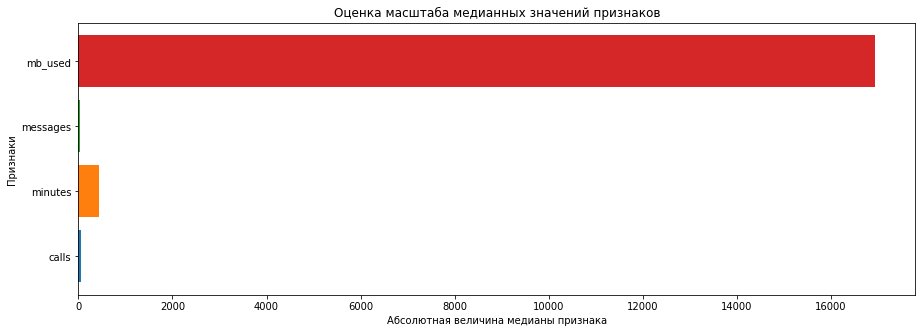

In [10]:
x = data_train.drop(['is_ultra'], axis=1).columns
y = [data[i].median() for i in data_train.drop(['is_ultra'], axis=1).columns]
plt.figure(figsize=(15,5))
plt.barh(x, y, color=colors_list)
plt.title('Оценка масштаба медианных значений признаков')
plt.xlabel('Абсолютная величина медианы признака')
plt.ylabel('Признаки')
plt.show()

Поэтому, перед обучением модели наши данные необходимо масштабировать.

Перед применением масштабирования выделим из выборок <ins>признаки</ins> и <ins>целевой признак</ins>. Для нашего случая признаками являются данные из столбцов: `calls`, `minutes`, `messages`, `mb_used`. Целевой признак: `is_ultra`.

Зададим признаки и целевой признак для наших выборок:

In [11]:
# Переменные для признаков и целевого признака
# обучающей выборки:
features_train = data_train.drop(['is_ultra'], axis=1)
target_train = data_train['is_ultra']

# Переменные для признаков и целевого признака
# валидационной выборки:
features_valid = data_valid.drop(['is_ultra'], axis=1)
target_valid = data_valid['is_ultra']

# Переменные для признаков и целевого признака
# тестовой выборки:
features_test = data_test.drop(['is_ultra'], axis=1)
target_test = data_test['is_ultra']

Нормализуем признаки для выборок:

In [12]:
features_train_scaled = MinMaxScaler().fit_transform(features_train) # признаки обучающей выборки
features_valid_scaled = MinMaxScaler().fit_transform(features_valid) # признаки валидационной выборки
features_test_scaled = MinMaxScaler().fit_transform(features_test) # признаки тестовой выборки

[Вернуться к оглавлению](#point0)

## Шаг 4. Исследование моделей

Для решения задачи классификации исследуем следующие модели машинного обучения:
* **DecisionTreeClassifier** - Решающее дерево
* **RandomForestClassifier** - Случайный лес
* **LogisticRegression** - Логистическая регрессия
* **SVC (Support Vector Machines)** - Метод опорных векторов

В качестве метрики качества используем *accuracy* (правильность):
<pre >            всего вопросов – количество ошибок    количество правильных ответов<br>accuracy = –––––––––––––––––––––––––––––––––––– = –––––––––––––––––––––––––––––<br>                      всего вопросов                     всего вопросов</pre>

<font color='red'>*</font> *Примечание*: В нашем случае метрику *accuracy* не совсем корректно применять для оценки качества модели, поскольку в целевом признаке наблюдается дисбаланс:

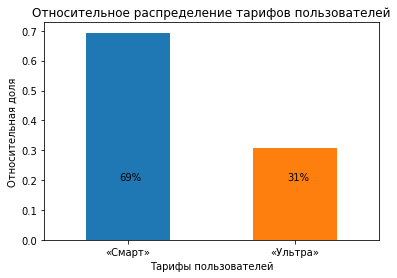

In [13]:
data['is_ultra'].value_counts(normalize=True).plot(kind='bar', rot=0, color=colors_list)
is_ultra_rate = round(100*data['is_ultra'].mean())
plt.title('Относительное распределение тарифов пользователей')
plt.xlabel('Тарифы пользователей')
plt.ylabel('Относительная доля')
plt.xticks(data['is_ultra'].unique(),labels=['«Смарт»','«Ультра»'])
plt.text(-0.05,0.2, f'{100-is_ultra_rate}%')
plt.text(0.95, 0.2, f'{is_ultra_rate}%')
plt.show()

Соотношение количества пользователей тарифов «Смарт» и «Ультра» в пропорции 70% и 30%. 

*Accuracy* учитывает общее количество правильных предсказаний без учета того, насколько часто встречаются эти классы в данных. Например, модель может достичь высокой точности, правильно предсказывая преобладающий класс, даже если она плохо работает с редкими классами. В подобном случае предпочтительно использовать метрику [balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html), которая корректирует традиционную "правильность", чтобы учесть неравновесие классов. 

Однако, забегая вперед, отмечу, что используя метрику `balanced_accuracy_score` мне не удалось достичь рекомендуемой условиями проекта точности `0.75`, поэтому буду использовать `accuracy_score`.

### Модель "решающее дерево"

Самый важный гиперпараметр решающего дерева — `max_depth`. В теории курса имеется такое выражение по поводу определения максимальной глубины дерева: "*Каким должен быть гиперпараметр `maх_depth`, чтобы улучшить нашу модель? Неизвестно. Поэтому в цикле нужно перебрать разные значения и сравнить качество моделей в разных вариантах*". Не очевидно, стоит ли соотносить гиперпараметр `maх_depth` с количеством признаков (в нашем случае их 4 шт), поэтому возьму для перебора диапазон с запасом.

Обучим модель **DecisionTreeClassifier** варьируя значение гиперпараметра `max_depth` от 1 до 15.

In [14]:
# задание переменных для фиксации и сравнения параметров модели:
best_model_dtc, best_result_dtc, best_depth_dtc, score_list_dtc, depth_list_dtc = None, 0, 0, [], []

# цикл перебора параметра max_depth:
for depth in range(1,16):
    # инициализация модели DecisionTreeClassifier
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    
    # обучение модели
    model.fit(features_train_scaled, target_train)
    
    # формирование предсказаний
    predictions_valid_dtc = model.predict(features_valid_scaled)
    
    # расчет параметра accuracy
    result = accuracy_score(target_valid, predictions_valid_dtc)        
    score_list_dtc.append(result)
    depth_list_dtc.append(depth)
    #print(f'max_depth = {depth}, score: {result:.3f}') # для вывода значений при каждой итерации
    
    if result > best_result_dtc: # сравнение результата
        best_result_dtc = result
        best_model_dtc = model
        best_depth_dtc = depth

Отобразим значения *accuracy* на графике:

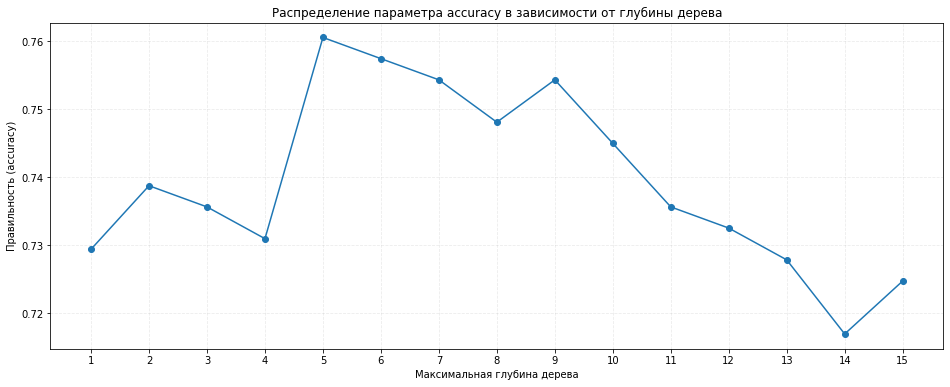

In [15]:
plt.figure(figsize=(16,6))
plt.plot(depth_list_dtc, score_list_dtc, 'o-')
plt.title("Распределение параметра accuracy в зависимости от глубины дерева")
plt.xlabel("Максимальная глубина дерева")
plt.ylabel("Правильность (accuracy)")
plt.grid(alpha=0.25, linestyle='--')
plt.xticks(depth_list_dtc)
plt.show()

In [16]:
print(f'Лучший результат модели: {best_result_dtc:.3f} при глубине деревьев {best_depth_dtc}')

Лучший результат модели: 0.760 при глубине деревьев 5


**Выводы**:
* Для модели "решающее дерево" лучший результат *accuracy* составляет 0.760 и достигается при глубине дерева равной 5.
* Для нашего набора данных заметно, что чрезмерное увеличение глубины деревьев не приносит ожидаемого прироста качества.

### Модель "случайный лес"

Обучим модель **RandomForestClassifier** варьируя параметры:
* `n_estimators` - количество деревьев: в диапазоне от 2 до 15 с шагом 1.
* `max_depth` - максимальная глубина дерева: в диапазоне от 1 до 10 с шагом 1.

In [17]:
# задание переменных для фиксации и сравнения параметров модели:
best_model_rfr, best_result_rfr, best_est_rfr, best_depth_rfr, score_list_rfr = None, 0, 0, 0, []

# цикл перебора параметров n_estimators и max_depth:
for est in range(2, 16, 1):
    for depth in range (1, 11):
        # инициализация модели RandomForestClassifier с параметрами:
        # random_state=12345, n_estimators=est и max_depth=depth:
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        
        # обучение модели на тренировочной выборке
        model.fit(features_train_scaled, target_train)
        
        # получение предсказаний модели на валидационной выборке
        predictions_valid_rfr = model.predict(features_valid_scaled) 
        
        # расчет параметра accuracy
        result = accuracy_score(target_valid, predictions_valid_rfr) 
        #print(f'est={est}, depth={depth}, result={result}') # для вывода значений при каждой итерации
        score_list_rfr.append([est,depth,result])
        
        if result > best_result_rfr: # сравнение результата
            best_model_rfr = model
            best_result_rfr = result
            best_est_rfr = est
            best_depth_rfr = depth

Отобразим на графике значения *accuracy* для различного количества дерерьев и максимальной глубины:

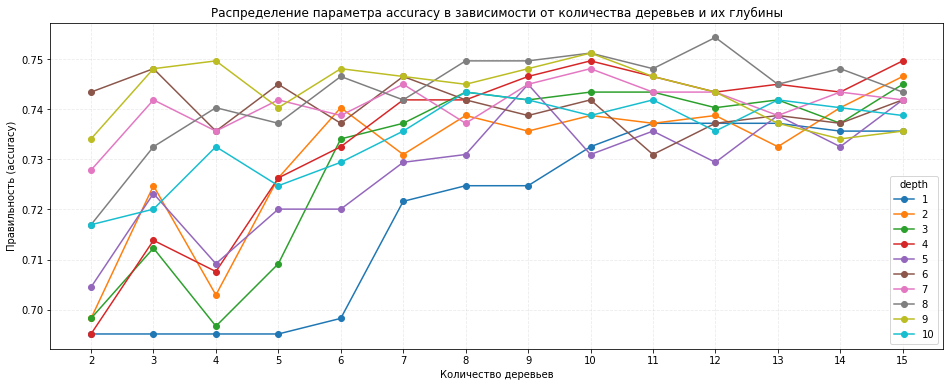

In [18]:
(pd.DataFrame(score_list_rfr, columns=['est', 'depth', 'result'])
 .pivot_table(index='est', columns='depth', values='result').plot(figsize=(16,6), style='o-'))
plt.title("Распределение параметра accuracy в зависимости от количества деревьев и их глубины")
plt.xlabel("Количество деревьев")
plt.ylabel("Правильность (accuracy)")
plt.xticks(pd.DataFrame(score_list_rfr)[0].unique())
plt.grid(alpha=0.25, linestyle='--')
plt.show()

In [19]:
print(f"Лучший результат модели: {best_result_rfr:.3f} при количестве деревьев {best_est_rfr}", 
      f"и глубине деревьев {best_depth_rfr}")

Лучший результат модели: 0.754 при количестве деревьев 12 и глубине деревьев 8


**Вывод**: Для модели "случайный лес" лучший результат 0.754 был достигнут при количестве деревьев 12 и глубине деревьев 8. 

### Модель "логистическая регрессия"

Обучим модель **LogisticRegression** со следующими гиперпараметрами:
* `random_state=12345` - фиксируем псевдослучайность для алгоритма.
* `solver='lbfgs'` - выбор алгоритма, который будет строить модель.
* `max_iter=1000` - максимальное количество итераций обучения.

In [20]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 

Обучим модель и сделаем предсказания:

In [21]:
model.fit(features_train_scaled, target_train)
predictions_valid_lr = model.predict(features_valid_scaled)

Рассчитаем параметр *accuracy*:

In [22]:
result_lr = accuracy_score(target_valid, predictions_valid_lr)
round(result_lr, 3)

0.72

**Вывод**: Модель "логистическая регрессия" показала значение параметра *accuracy* 0.72.

### Метод опорных векторов

Обучим модель **SVC** (Support Vector Classification) со следующими гиперпараметрами:
* `kernel="rbf"` - выбор [ядра для алгоритма](https://scikit-learn.ru/1-4-support-vector-machines/): **Radial Basis Function** (Радиальной Базовой Функции), с функцией $\exp(-\gamma|x-x'|^2)$
* `gamma` - значение параметра $\gamma$: варьируем в диапазоне от 0.1 до 2.0 с шагом 0.1.

In [23]:
# задание переменных для фиксации и сравнения параметров модели:
best_model_svc, best_result_svc, score_list_svc, gamma_list = None, 0, [], []

# цикл перебора параметра gamma:
for g in [i / 10 for i in range(1, 21)]:
    model = SVC(kernel="rbf", gamma=g) # инициализация модели SVC
    model.fit(features_train_scaled, target_train) # обучение модели
    predictions_valid = model.predict(features_valid_scaled) # формирование предсказаний
    result = accuracy_score(target_valid, predictions_valid) # расчет параметра accuracy
    score_list_svc.append(result)
    gamma_list.append(g)
    #print(f'gamma = {g}, score: {result:.3f}') # для вывода значений при каждой итерации
    if result > best_result_svc: # сравнение результата
        best_gamma = g
        best_result_svc = result
        best_model_svc = model

Построим график для значений *accuracy* в зависимости от параметра gamma:

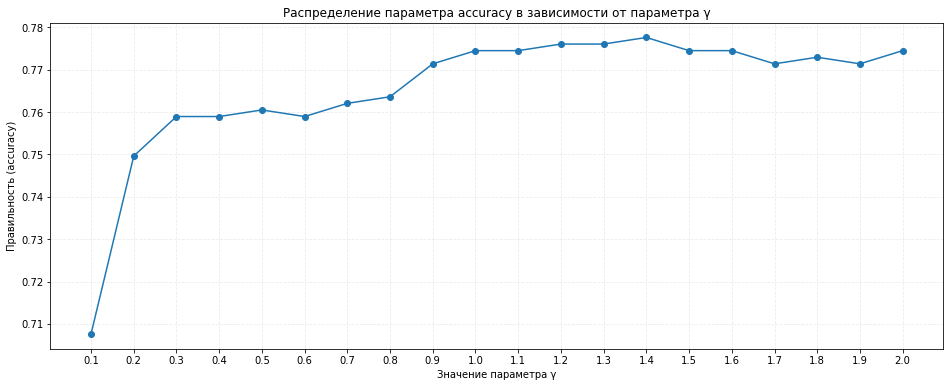

In [24]:
plt.figure(figsize=(16,6))
plt.plot(gamma_list, score_list_svc, 'o-')
plt.title("Распределение параметра accuracy в зависимости от параметра γ")
plt.xlabel("Значение параметра γ")
plt.ylabel("Правильность (accuracy)")
plt.grid(alpha=0.25, linestyle='--')
plt.xticks(gamma_list)
plt.show()

In [25]:
print(f'Лучший результат модели: {best_result_svc:.3f} при параметре γ={best_gamma}')

Лучший результат модели: 0.778 при параметре γ=1.4


**Вывод**: Модель метода опорных векторов показала значение параметра *accuracy* 0.778 при $\gamma$=1.4.

In [26]:
# итоговая таблица:
pd.DataFrame(data=[best_result_dtc, best_result_rfr, result_lr, best_result_svc], 
             index=['Решающее дерево','Случайный лес','Логистическая регрессия','Метод опорных векторов'], 
             columns=['Accuracy']).sort_values(by='Accuracy', ascending=False)

,Accuracy
Метод опорных векторов,0.778
Решающее дерево,0.760
Случайный лес,0.754
Логистическая регрессия,0.720


**Выводы**:
* Для решения задачи классификации было обучено 4 модели: <ins>решающее дерево</ins>, <ins>случайный лес</ins>, <ins>логистическая регрессия</ins> и <ins>метод опорных векторов</ins>.
* Лучший результат предсказаний по метрике *accuracy* у модели **метода опорных векторов**: *accuracy*=0.778 при $\gamma$=1.4.
* На втором месте модель "решающее дерево" *accuracy*=0.760 при глубине деревьев 5.
* *Коллективный разум* в лице модели "случайный лес" не смог превзойти результат собрата, лучший результат *accuracy*=0.754 достигнут при значении гиперпараметров:  количество деревьев - 12 и глубина деревьев - 8.
* Модель "логистическая регрессия" показала самый скромный результат из всех исследуемых моделей: *accuracy*=0.72 на алгоритме `'lbfgs'` и значении `max_iter=1000`.
* Предположительно, на результат предсказаний рассмотренных моделей повлиял дисбаланс целевого признака: соотношение пользователей тарифов «Смарт» и «Ультра» в пропорции 70% и 30%.
* По итогам рассчетов, лучшей моделью признана модель **метода опорных векторов**.

In [27]:
# присвоение значения для лучшей модели:
best_model = best_model_svc

[Вернуться к оглавлению](#point0)

## Шаг 5. Проверка модели на тестовой выборке

Проверим модель машинного обучения на тестовой выборке. 

Сформируем предсказания модели `predictions_test` на основе масштабированных признаков тестовой выборки `features_test_scaled`:

In [28]:
predictions_test = best_model.predict(features_test_scaled)

Рассчитаем параметр *accuracy* на основе сформированных предсказаний и целевого признака тестовой выборки (значение округлим до тысячных):

In [29]:
accuracy_score_test = round(accuracy_score(target_test, predictions_test), 3)
accuracy_score_test

0.792

**Вывод**: проверка модели машинного обучения метода опорных векторова на тестовой выборке показала неплохой результат значения *accuracy*: 0.792.

[Вернуться к оглавлению](#point0)

## Шаг 6. Проверка модели на адекватность
Чтобы оценить адекватность модели в задачах классификации, нужно сравнить её со случайной. Например рассчитать метрику качества для случая, когда целевой признак заполнен популярным значением. 

В нашем датасете наиболее популярный у пользователей целевой признак (тариф) - «Смарт», т.е. значение `data['is_ultra'] = 0`.

Сформируем предсказания со значениями заполненными `0`:

In [30]:
sanity_check_predictions = pd.Series(0, index=target_test.index)

Рассчитаем метрику *accuracy* для данного случая:

In [31]:
accuracy_score_sanity_check = round(accuracy_score(target_test, sanity_check_predictions), 3)
accuracy_score_sanity_check

0.695

Сравним полученное значение с качеством нашей обученной модели:

In [32]:
if accuracy_score_test > accuracy_score_sanity_check:
    print(green + '🙂 Предсказания полученные на основе обученной модели точнее, чем случайные!' + end)
    print(f'{accuracy_score_test} > {accuracy_score_sanity_check}')
else:
    print(red + '😩 Предсказания полученные на основе обученной модели не достаточно точные...' + end)
    print(f'{accuracy_score_test} < {accuracy_score_sanity_check}')

🙂 Предсказания полученные на основе обученной модели точнее, чем случайные!
0.792 > 0.695


**Вывод**: Предсказания сформированные на основе обученной модели почти на 10% оказались точнее, чем при случайном заполнении.

[Вернуться к оглавлению](#point0)

## Шаг 7. Общий вывод

Для данных предоставленных оператором мобильной связи «Мегалайн», содержащих информацию об активности клиентов за месяц с целью обучения модели для задачи классификации, которая на основании поведения клиентов подберет для них подходящий тариф, было проведено исследование, в рамках которого:
1. Изучена общая информация датасета о поведении клиентов.
2. Из имеющихся данных с целью обучения, валидации и тестирования модели сформированы выборки: обучающая, валидационная и тестовая в соотношении 3:1:1.
3. Произведено масштабирование признаков методом нормализации.
4. С помощью сформированных выборок обучены и проверены следующие модели машинного обучения:
* Решающее дерево
* Случайный лес
* Логистическая регрессия
* Метод опорных векторов  

  В качестве метрики качества использовался параметр *accuracy* (правильность).
  Получены следующие результаты:
  * Лучший результат предсказаний у модели **метода опорных векторов**: *accuracy*=0.778 при $\gamma$=1.4.
  * На втором месте модель "решающее дерево" *accuracy*=0.760 при глубине деревьев 5.
  * Модель случайного леса показала результат *accuracy*=0.753 достигнутый при значении гиперпараметров: количестве деревьев - 12 и глубине деревьев - 8.
  * Модель "логистическая регрессия" показала самый скромный результат из всех исследуемых моделей: *accuracy*=0.72 на алгоритме `'lbfgs'` и значении `max_iter=1000`.
  * Предположительно, на результат предсказаний рассмотренных моделей повлиял дисбаланс целевого признака: соотношение пользователей тарифов «Смарт» и «Ультра» в пропорции 70% и 30%.
  * По итогам расчетов, лучшей моделью признана модель **метода опорных векторов**.

5. Лучшая из обученных моделей проверена на тестовой выборке. Получено значение *accuracy*: 0.792.
6. Модель проверена на адекватность. Метрика качества обученной модели соотнесена со значением *accuracy*, при котором предсказания были сформированы заполнением значений самым популярным целевым признаком (значение тарифа «Смарт», т.е. значение `data['is_ultra'] = 0`). Результаты обученной модели на 10% оказались точнее, чем при случайном заполнении.

Полученное при обучении модели значение *accuracy*=0.792 больше порогового значения по условиям проекта <font color='red'>0.75</font>, следовательно, поставленную цель можно считать достигнутой. Обученная модель может быть использована для подбора тарифов клиента.

[Вернуться к оглавлению](#point0)